In [1]:
!wget -N https://data.rivm.nl/covid-19/COVID-19_casus_landelijk.csv

--2023-03-20 10:39:11--  https://data.rivm.nl/covid-19/COVID-19_casus_landelijk.csv
Resolving data.rivm.nl (data.rivm.nl)... 131.224.250.75, 2001:610:430:ffff::16:198
Connecting to data.rivm.nl (data.rivm.nl)|131.224.250.75|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 585601581 (558M) [text/csv]
Saving to: ‘COVID-19_casus_landelijk.csv’

COVID-19_casus_land 100%[===================>] 558.47M  7.71MB/s    in 82s     

2023-03-20 10:40:33 (6.82 MB/s) - ‘COVID-19_casus_landelijk.csv’ saved [585601581/585601581]



In [2]:
import pandas as pd
import numpy  as np

from pyearth import Earth
from pyearth import export

#from jupyterthemes import jtplot
#jtplot.style(theme='onedork')

%matplotlib inline

In [3]:
df = pd.read_csv('COVID-19_casus_landelijk.csv', sep=';', parse_dates=[1, 2], infer_datetime_format=True)
df

Version           Date_file Date_statistics Date_statistics_type  \
0              7 2023-03-17 10:00:00      2021-10-04                  DPL   
1              7 2023-03-17 10:00:00      2021-10-04                  DPL   
2              7 2023-03-17 10:00:00      2021-10-04                  DPL   
3              7 2023-03-17 10:00:00      2021-10-04                  DOO   
4              7 2023-03-17 10:00:00      2021-10-04                  DOO   
...          ...                 ...             ...                  ...   
6590352        7 2023-03-17 10:00:00      2023-03-17                  DPL   
6590353        7 2023-03-17 10:00:00      2023-03-17                  DPL   
6590354        7 2023-03-17 10:00:00      2023-03-17                  DPL   
6590355        7 2023-03-17 10:00:00      2023-03-17                  DPL   
6590356        7 2023-03-17 10:00:00      2023-03-17                  DPL   

        Agegroup      Sex       Province Deceased  Week_of_death  \
0          50-59     Male   Zuid-Holland       No            NaN   
1          10-19     Male   Zuid-Holland       No            NaN   
2          20-29     Male      Groningen       No            NaN   
3            0-9     Male  Noord-Brabant       No            NaN   
4          30-39   Female   Zuid-Holland       No            NaN   
...          ...      ...            ...      ...            ...   
6590352      90+  Unknown        Zeeland  Unknown            NaN   
6590353    70-79  Unknown        Zeeland  Unknown            NaN   
6590354    80-89  Unknown        Zeeland  Unknown            NaN   
6590355    60-69  Unknown        Zeeland  Unknown            NaN   
6590356      90+  Unknown        Zeeland  Unknown            NaN   

        Municipal_health_service  
0                 GGD Haaglanden  
1                 GGD Haaglanden  
2                  GGD Groningen  
3          GGD Hart voor Brabant  
4            GGD Hollands-Midden  
...                          ...  
6590352              GGD Zeeland  
6590353              GGD Zeeland  
6590354              GGD Zeeland  
6590355              GGD Zeeland  
6590356              GGD Zeeland  

[6590357 rows x 10 columns]

In [4]:
df.count()

Version                     6590357
Date_file                   6590357
Date_statistics             6590357
Date_statistics_type        6590357
Agegroup                    6590357
Sex                         6590357
Province                    6590218
Deceased                    6590357
Week_of_death                  4722
Municipal_health_service    6590203
dtype: int64

In [5]:
daterep = 'Date_statistics'
region  = 'Agegroup'
cases   = 'cases'
deaths  = 'Deceased'

lastdate = df[daterep].max() - pd.Timedelta('0 days')

df[cases]  = 1
df[deaths] = df[deaths].apply(lambda x: 1 if x == 'Yes' else 0)
df

Version           Date_file Date_statistics Date_statistics_type  \
0              7 2023-03-17 10:00:00      2021-10-04                  DPL   
1              7 2023-03-17 10:00:00      2021-10-04                  DPL   
2              7 2023-03-17 10:00:00      2021-10-04                  DPL   
3              7 2023-03-17 10:00:00      2021-10-04                  DOO   
4              7 2023-03-17 10:00:00      2021-10-04                  DOO   
...          ...                 ...             ...                  ...   
6590352        7 2023-03-17 10:00:00      2023-03-17                  DPL   
6590353        7 2023-03-17 10:00:00      2023-03-17                  DPL   
6590354        7 2023-03-17 10:00:00      2023-03-17                  DPL   
6590355        7 2023-03-17 10:00:00      2023-03-17                  DPL   
6590356        7 2023-03-17 10:00:00      2023-03-17                  DPL   

        Agegroup      Sex       Province  Deceased  Week_of_death  \
0          50-59     Male   Zuid-Holland         0            NaN   
1          10-19     Male   Zuid-Holland         0            NaN   
2          20-29     Male      Groningen         0            NaN   
3            0-9     Male  Noord-Brabant         0            NaN   
4          30-39   Female   Zuid-Holland         0            NaN   
...          ...      ...            ...       ...            ...   
6590352      90+  Unknown        Zeeland         0            NaN   
6590353    70-79  Unknown        Zeeland         0            NaN   
6590354    80-89  Unknown        Zeeland         0            NaN   
6590355    60-69  Unknown        Zeeland         0            NaN   
6590356      90+  Unknown        Zeeland         0            NaN   

        Municipal_health_service  cases  
0                 GGD Haaglanden      1  
1                 GGD Haaglanden      1  
2                  GGD Groningen      1  
3          GGD Hart voor Brabant      1  
4            GGD Hollands-Midden      1  
...                          ...    ...  
6590352              GGD Zeeland      1  
6590353              GGD Zeeland      1  
6590354              GGD Zeeland      1  
6590355              GGD Zeeland      1  
6590356              GGD Zeeland      1  

[6590357 rows x 11 columns]

In [6]:
df_geo = df.pivot_table(index=daterep, columns=region, values=[cases, deaths], aggfunc='sum').fillna(0)
df_geo['cases']

Agegroup           0-9  10-19  20-29  30-39  40-49  50-59  60-69  70-79  \
Date_statistics                                                           
2021-10-04       243.0  477.0  413.0  416.0  333.0  268.0  203.0  120.0   
2021-10-05       258.0  448.0  482.0  442.0  392.0  315.0  210.0  139.0   
2021-10-06       228.0  421.0  445.0  381.0  391.0  320.0  238.0  137.0   
2021-10-07       236.0  467.0  414.0  382.0  376.0  282.0  206.0  126.0   
2021-10-08       252.0  505.0  447.0  391.0  392.0  311.0  253.0  148.0   
...                ...    ...    ...    ...    ...    ...    ...    ...   
2023-03-13        16.0    7.0   23.0   28.0   27.0   62.0   50.0  120.0   
2023-03-14        26.0   17.0   46.0   56.0   66.0   84.0  102.0  163.0   
2023-03-15        13.0    4.0    8.0   18.0   23.0   28.0   58.0   77.0   
2023-03-16         4.0    2.0    8.0   10.0   23.0   19.0   27.0   61.0   
2023-03-17         0.0    0.0    0.0    0.0    0.0    2.0    2.0    6.0   

Agegroup         80-89   90+  <50  Unknown  
Date_statistics                             
2021-10-04        65.0  14.0  0.0      0.0  
2021-10-05        68.0  24.0  0.0      0.0  
2021-10-06        68.0  17.0  0.0      0.0  
2021-10-07        68.0  17.0  0.0      0.0  
2021-10-08        72.0  19.0  0.0      0.0  
...                ...   ...  ...      ...  
2023-03-13       131.0  39.0  0.0      0.0  
2023-03-14       173.0  67.0  0.0      0.0  
2023-03-15        70.0  20.0  0.0      1.0  
2023-03-16        53.0  15.0  0.0      0.0  
2023-03-17         1.0   4.0  0.0      0.0  

[530 rows x 12 columns]

For predictions later on we need extra rows in our dataframe. One of the ways to do that is reindexing with a larger range, so we add to the current range and check our latest date.

In [7]:
new_index = pd.date_range(df_geo.index.min(), df_geo.index.max() + pd.Timedelta('365 days'))
df_geo = df_geo.reindex(new_index)
df_geo

Deceased                                                       ...  \
Agegroup        0-9 10-19 20-29 30-39 40-49 50-59 60-69 70-79 80-89  90+  ...   
2021-10-04      0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   2.0  2.0  ...   
2021-10-05      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  1.0  ...   
2021-10-06      0.0   0.0   0.0   0.0   0.0   0.0   2.0   1.0   5.0  1.0  ...   
2021-10-07      0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   3.0  2.0  ...   
2021-10-08      0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   6.0  1.0  ...   
...             ...   ...   ...   ...   ...   ...   ...   ...   ...  ...  ...   
2024-03-12      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  ...   
2024-03-13      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  ...   
2024-03-14      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  ...   
2024-03-15      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  ...   
2024-03-16      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  ...   

            cases                                                              
Agegroup    20-29  30-39  40-49  50-59  60-69  70-79 80-89   90+  <50 Unknown  
2021-10-04  413.0  416.0  333.0  268.0  203.0  120.0  65.0  14.0  0.0     0.0  
2021-10-05  482.0  442.0  392.0  315.0  210.0  139.0  68.0  24.0  0.0     0.0  
2021-10-06  445.0  381.0  391.0  320.0  238.0  137.0  68.0  17.0  0.0     0.0  
2021-10-07  414.0  382.0  376.0  282.0  206.0  126.0  68.0  17.0  0.0     0.0  
2021-10-08  447.0  391.0  392.0  311.0  253.0  148.0  72.0  19.0  0.0     0.0  
...           ...    ...    ...    ...    ...    ...   ...   ...  ...     ...  
2024-03-12    NaN    NaN    NaN    NaN    NaN    NaN   NaN   NaN  NaN     NaN  
2024-03-13    NaN    NaN    NaN    NaN    NaN    NaN   NaN   NaN  NaN     NaN  
2024-03-14    NaN    NaN    NaN    NaN    NaN    NaN   NaN   NaN  NaN     NaN  
2024-03-15    NaN    NaN    NaN    NaN    NaN    NaN   NaN   NaN  NaN     NaN  
2024-03-16    NaN    NaN    NaN    NaN    NaN    NaN   NaN   NaN  NaN     NaN  

[895 rows x 24 columns]

We need numerical data as inputs for a model, so we add a column representing the date as days since the start of the index.

In [8]:
df_geo['daynum'] = (df_geo.index - df_geo.index.min()).days
df_geo['daynum'].describe()

count    895.000000
mean     447.000000
std      258.508543
min        0.000000
25%      223.500000
50%      447.000000
75%      670.500000
max      894.000000
Name: daynum, dtype: float64

We create a simple dataframe to contain the source values for our fitting approach. The typical progress of an outbreak seems to fit a Gumbel distribution, where the cumulative distribution is a double negative exponent: `exp(-exp(-x))`. The measures are averaged by week to smooth out reporting lags.

In [9]:
def gumpdf(x, beta, mu):
    """Return PDF value according to Gumbel"""
    expon = - ((x - mu) / beta)
    return(np.exp(expon) * np.exp(- (np.exp(expon))) / beta)

def gumcdf(x, beta, mu):
    """Return CDF value according to Gumbel"""
    expon = - ((x - mu) / beta)
    return(np.exp(- (np.exp(expon))))

In [10]:
import matplotlib as mpl
mpl.rc('figure', max_open_warning = 0)

Running multiple wave analysis for '0-9'
Minimum number of cases is 2
Wave 01 beta  9.827 mu  17 fit 0.861 peak 2021-10-21 from 2021-10-04 to 2021-12-30 size 11486
Wave 02 beta 19.186 mu  57 fit 0.873 peak 2021-11-30 from 2021-10-15 to 2022-05-21 size 145226
Wave 03 beta 10.288 mu 117 fit 0.947 peak 2022-01-29 from 2022-01-04 to 2022-05-15 size 283753
Wave 04 beta  6.890 mu 164 fit 0.786 peak 2022-03-17 from 2022-03-01 to 2022-05-16 size 36205
Wave 05 beta  7.883 mu  53 fit 0.246 peak 2021-11-26 from 2021-11-10 to 2022-01-11 size 2667
Wave 06 beta  4.388 mu 260 fit 0.818 peak 2022-06-21 from 2022-06-13 to 2022-07-14 size 713
Wave 07 beta 11.079 mu 280 fit 0.808 peak 2022-07-11 from 2022-06-18 to 2022-09-13 size 3536


/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirty-py3.10-linux-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirty-py3.10-linux-x86_64.egg/pyearth/earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]
/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirt

Wave 08 beta  2.354 mu   7 fit 0.468 peak 2021-10-11 from 2021-10-07 to 2021-10-23 size 358
Wave 09 beta  5.277 mu 329 fit 0.856 peak 2022-08-29 from 2022-08-21 to 2022-09-20 size 298
Wave 10 beta  4.986 mu 339 fit 0.907 peak 2022-09-08 from 2022-08-31 to 2022-09-29 size 259
Wave 11 beta  6.134 mu 350 fit 0.921 peak 2022-09-19 from 2022-09-08 to 2022-10-14 size 373
Wave 12 beta  4.862 mu 361 fit 0.887 peak 2022-09-30 from 2022-09-22 to 2022-10-20 size 263
Wave 13 beta  5.732 mu 372 fit 0.869 peak 2022-10-11 from 2022-10-01 to 2022-11-06 size 564
Wave 14 beta  7.774 mu 387 fit 0.873 peak 2022-10-26 from 2022-10-12 to 2022-11-29 size 561
Wave 15 beta 13.054 mu 411 fit 0.898 peak 2022-11-19 from 2022-10-28 to 2023-01-07 size 569
Wave 16 beta  6.328 mu 430 fit 0.851 peak 2022-12-08 from 2022-11-29 to 2022-12-28 size 148


/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirty-py3.10-linux-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirty-py3.10-linux-x86_64.egg/pyearth/earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]
/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirt

Wave 17 beta  5.604 mu 443 fit 0.860 peak 2022-12-21 from 2022-12-12 to 2023-01-10 size 180
Wave 18 beta  4.586 mu 451 fit 0.883 peak 2022-12-29 from 2022-12-23 to 2023-01-14 size 131
Wave 19 beta  4.692 mu 460 fit 0.625 peak 2023-01-07 from 2023-01-01 to 2023-01-21 size 86
Wave 20 beta  6.918 mu 476 fit 0.819 peak 2023-01-23 from 2023-01-13 to 2023-02-13 size 128
Wave 21 beta 12.364 mu 499 fit 0.827 peak 2023-02-15 from 2023-01-27 to 2023-03-27 size 313
Wave 22 beta 13.042 mu 522 fit 0.785 peak 2023-03-10 from 2023-02-17 to 2023-04-26 size 473
--- no data for wave


/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirty-py3.10-linux-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirty-py3.10-linux-x86_64.egg/pyearth/earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]
/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirt

Running multiple wave analysis for '10-19'
Minimum number of cases is 2
Wave 01 beta  6.003 mu  13 fit 0.847 peak 2021-10-17 from 2021-10-04 to 2021-12-01 size 11225
Wave 02 beta 20.596 mu  53 fit 0.812 peak 2021-11-26 from 2021-10-07 to 2022-06-02 size 188199
Wave 03 beta  2.318 mu  51 fit 0.742 peak 2021-11-24 from 2021-11-20 to 2021-12-09 size 1092
Wave 04 beta 10.666 mu 119 fit 0.948 peak 2022-01-31 from 2022-01-03 to 2022-05-31 size 798601
Wave 05 beta  4.833 mu  98 fit 0.704 peak 2022-01-10 from 2021-12-29 to 2022-02-24 size 49705
Wave 06 beta  5.511 mu 175 fit 0.767 peak 2022-03-28 from 2022-03-15 to 2022-05-14 size 24556


/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirty-py3.10-linux-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirty-py3.10-linux-x86_64.egg/pyearth/earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]
/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirt

Wave 07 beta  4.282 mu 101 fit 0.785 peak 2022-01-13 from 2022-01-04 to 2022-02-12 size 4189
Wave 08 beta  5.459 mu 264 fit 0.874 peak 2022-06-25 from 2022-06-13 to 2022-07-31 size 4128
Wave 09 beta  5.018 mu 274 fit 0.908 peak 2022-07-05 from 2022-06-24 to 2022-08-05 size 2519
Wave 10 beta  6.070 mu 283 fit 0.908 peak 2022-07-14 from 2022-07-02 to 2022-08-25 size 5107
Wave 11 beta  7.856 mu 301 fit 0.763 peak 2022-08-01 from 2022-07-16 to 2022-09-16 size 2598
Wave 12 beta  6.144 mu 320 fit 0.850 peak 2022-08-20 from 2022-08-09 to 2022-09-19 size 707
Wave 13 beta 11.394 mu 342 fit 0.858 peak 2022-09-11 from 2022-08-20 to 2022-11-10 size 2084
Wave 14 beta  6.930 mu 359 fit 0.915 peak 2022-09-28 from 2022-09-15 to 2022-11-01 size 850


/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirty-py3.10-linux-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirty-py3.10-linux-x86_64.egg/pyearth/earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]
/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirt

Wave 15 beta  9.566 mu 374 fit 0.921 peak 2022-10-13 from 2022-09-24 to 2022-12-03 size 1980
Wave 16 beta  6.302 mu 388 fit 0.723 peak 2022-10-27 from 2022-10-16 to 2022-11-26 size 651
Wave 17 beta 10.108 mu 406 fit 0.697 peak 2022-11-14 from 2022-10-27 to 2022-12-29 size 793
Wave 18 beta  7.202 mu 418 fit 0.836 peak 2022-11-26 from 2022-11-13 to 2022-12-27 size 509
Wave 19 beta  5.675 mu 429 fit 0.884 peak 2022-12-07 from 2022-11-27 to 2022-12-31 size 362
Wave 20 beta  8.800 mu 446 fit 0.804 peak 2022-12-24 from 2022-12-08 to 2023-01-30 size 559
Wave 21 beta 29.308 mu 513 fit 0.692 peak 2023-03-01 from 2023-01-09 to 2023-06-23 size 1454
--- no data for wave


/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirty-py3.10-linux-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirty-py3.10-linux-x86_64.egg/pyearth/earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]
/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirt

Running multiple wave analysis for '20-29'
Minimum number of cases is 2
Wave 01 beta  5.827 mu  12 fit 0.849 peak 2021-10-16 from 2021-10-04 to 2021-11-30 size 10513
Wave 02 beta 11.327 mu  32 fit 0.967 peak 2021-11-05 from 2021-10-10 to 2022-02-05 size 37360
Wave 03 beta  7.396 mu  41 fit 0.979 peak 2021-11-14 from 2021-10-29 to 2022-01-12 size 20642
Wave 04 beta  6.503 mu  49 fit 0.901 peak 2021-11-22 from 2021-11-07 to 2022-01-16 size 27954


/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirty-py3.10-linux-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirty-py3.10-linux-x86_64.egg/pyearth/earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]
/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirt

Wave 05 beta  9.346 mu  67 fit 0.830 peak 2021-12-10 from 2021-11-18 to 2022-02-28 size 43540
Wave 06 beta  6.707 mu  85 fit 0.950 peak 2021-12-28 from 2021-12-13 to 2022-02-23 size 29084
Wave 07 beta  9.590 mu 102 fit 0.788 peak 2022-01-14 from 2021-12-21 to 2022-04-20 size 216576
Wave 08 beta 12.387 mu 128 fit 0.844 peak 2022-02-09 from 2022-01-09 to 2022-06-20 size 444181
Wave 09 beta  7.112 mu 156 fit 0.772 peak 2022-03-09 from 2022-02-20 to 2022-05-22 size 218852
--- no data for wave


/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirty-py3.10-linux-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirty-py3.10-linux-x86_64.egg/pyearth/earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]
/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirt

Running multiple wave analysis for '30-39'
Minimum number of cases is 2
Wave 01 beta  5.152 mu  11 fit 0.803 peak 2021-10-15 from 2021-10-04 to 2021-11-23 size 8318
Wave 02 beta  9.610 mu  29 fit 0.846 peak 2021-11-02 from 2021-10-11 to 2022-01-20 size 33555
Wave 03 beta  7.009 mu  42 fit 0.859 peak 2021-11-15 from 2021-10-30 to 2022-01-13 size 30214
Wave 04 beta  6.302 mu  51 fit 0.926 peak 2021-11-24 from 2021-11-10 to 2022-01-18 size 35518
Wave 05 beta  5.410 mu  61 fit 0.937 peak 2021-12-04 from 2021-11-22 to 2022-01-19 size 24887


/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirty-py3.10-linux-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirty-py3.10-linux-x86_64.egg/pyearth/earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]
/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirt

Wave 06 beta  7.933 mu  73 fit 0.929 peak 2021-12-16 from 2021-11-27 to 2022-02-20 size 32720
Wave 07 beta  6.963 mu  86 fit 0.807 peak 2021-12-29 from 2021-12-13 to 2022-02-26 size 28232
Wave 08 beta  7.764 mu 100 fit 0.904 peak 2022-01-12 from 2021-12-24 to 2022-03-25 size 78631
Wave 09 beta 13.120 mu 124 fit 0.919 peak 2022-02-05 from 2022-01-03 to 2022-06-24 size 520760
Wave 10 beta  4.587 mu 155 fit 0.823 peak 2022-03-08 from 2022-02-25 to 2022-04-24 size 107829
Wave 11 beta  7.598 mu 169 fit 0.825 peak 2022-03-22 from 2022-03-04 to 2022-06-04 size 110206
Wave 12 beta  6.664 mu 186 fit 0.498 peak 2022-04-08 from 2022-03-25 to 2022-05-24 size 5836
Wave 13 beta  7.794 mu 218 fit 0.702 peak 2022-05-10 from 2022-04-24 to 2022-06-30 size 5078


/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirty-py3.10-linux-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirty-py3.10-linux-x86_64.egg/pyearth/earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]
/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirt

Wave 14 beta  5.078 mu 237 fit 0.838 peak 2022-05-29 from 2022-05-19 to 2022-06-28 size 1760
Wave 15 beta  6.219 mu 248 fit 0.846 peak 2022-06-09 from 2022-05-27 to 2022-07-19 size 3742
Wave 16 beta  5.916 mu 259 fit 0.845 peak 2022-06-20 from 2022-06-07 to 2022-08-01 size 7771
Wave 17 beta  5.828 mu 268 fit 0.882 peak 2022-06-29 from 2022-06-16 to 2022-08-12 size 9726
Wave 18 beta  4.931 mu 123 fit 0.010 peak 2022-02-04 from 2022-01-26 to 2022-03-03 size 1150
Wave 19 beta  7.436 mu 283 fit 0.937 peak 2022-07-14 from 2022-06-27 to 2022-09-11 size 20236
Wave 20 beta  5.345 mu 299 fit 0.843 peak 2022-07-30 from 2022-07-19 to 2022-09-05 size 4785


/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirty-py3.10-linux-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirty-py3.10-linux-x86_64.egg/pyearth/earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]
/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirt

Wave 21 beta  5.056 mu 311 fit 0.899 peak 2022-08-11 from 2022-08-01 to 2022-09-11 size 2084
Wave 22 beta  8.543 mu 326 fit 0.843 peak 2022-08-26 from 2022-08-08 to 2022-10-17 size 3772
Wave 23 beta  6.107 mu 342 fit 0.843 peak 2022-09-11 from 2022-08-30 to 2022-10-18 size 2534
Wave 24 beta  5.909 mu 355 fit 0.896 peak 2022-09-24 from 2022-09-12 to 2022-10-30 size 2554
Wave 25 beta  8.471 mu 369 fit 0.889 peak 2022-10-08 from 2022-09-20 to 2022-12-06 size 8982
Wave 26 beta 10.191 mu 386 fit 0.889 peak 2022-10-25 from 2022-10-03 to 2022-12-29 size 5926
Wave 27 beta  7.961 mu 412 fit 0.868 peak 2022-11-20 from 2022-11-05 to 2023-01-03 size 1752
Wave 28 beta  8.624 mu 430 fit 0.914 peak 2022-12-08 from 2022-11-22 to 2023-01-25 size 1997
Wave 29 beta 10.319 mu 449 fit 0.788 peak 2022-12-27 from 2022-12-07 to 2023-02-22 size 2366


/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirty-py3.10-linux-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirty-py3.10-linux-x86_64.egg/pyearth/earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]
/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirt

Wave 30 beta 18.441 mu 503 fit 0.746 peak 2023-02-19 from 2023-01-15 to 2023-05-22 size 2655
--- no data for wave
Running multiple wave analysis for '40-49'
Minimum number of cases is 2
Wave 01 beta  5.321 mu  12 fit 0.883 peak 2021-10-16 from 2021-10-04 to 2021-11-23 size 7371
Wave 02 beta  9.716 mu  28 fit 0.958 peak 2021-11-01 from 2021-10-10 to 2022-01-16 size 24566
Wave 03 beta 16.503 mu  56 fit 0.925 peak 2021-11-29 from 2021-10-20 to 2022-04-28 size 141818
Wave 04 beta  6.330 mu  91 fit 0.854 peak 2022-01-03 from 2021-12-19 to 2022-02-23 size 19675
Wave 05 beta  2.921 mu  47 fit 0.582 peak 2021-11-20 from 2021-11-14 to 2021-12-07 size 1148
Wave 06 beta  6.736 mu 103 fit 0.969 peak 2022-01-15 from 2021-12-30 to 2022-03-18 size 62094


/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirty-py3.10-linux-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirty-py3.10-linux-x86_64.egg/pyearth/earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]
/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirt

Wave 07 beta 10.980 mu 123 fit 0.885 peak 2022-02-04 from 2022-01-07 to 2022-06-01 size 429561
Wave 08 beta  5.366 mu 158 fit 0.925 peak 2022-03-11 from 2022-02-26 to 2022-05-04 size 124972
Wave 09 beta  7.686 mu 174 fit 0.847 peak 2022-03-27 from 2022-03-08 to 2022-06-05 size 72440
Wave 10 beta  6.003 mu 225 fit 0.841 peak 2022-05-17 from 2022-05-05 to 2022-06-24 size 2922
Wave 11 beta  7.463 mu 242 fit 0.801 peak 2022-06-03 from 2022-05-19 to 2022-07-18 size 2804
Wave 12 beta 17.642 mu 273 fit 0.895 peak 2022-07-04 from 2022-05-25 to 2022-11-21 size 47033
Wave 13 beta  6.146 mu 345 fit 0.822 peak 2022-09-14 from 2022-09-02 to 2022-10-22 size 2601
Wave 14 beta 14.006 mu 372 fit 0.949 peak 2022-10-11 from 2022-09-10 to 2023-01-20 size 18233


/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirty-py3.10-linux-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirty-py3.10-linux-x86_64.egg/pyearth/earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]
/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirt

Wave 15 beta  9.458 mu 418 fit 0.852 peak 2022-11-26 from 2022-11-07 to 2023-01-14 size 1670
Wave 16 beta  7.135 mu 432 fit 0.808 peak 2022-12-10 from 2022-11-26 to 2023-01-15 size 1119
Wave 17 beta 10.252 mu 449 fit 0.866 peak 2022-12-27 from 2022-12-07 to 2023-02-22 size 2338
Wave 18 beta 17.723 mu 504 fit 0.750 peak 2023-02-20 from 2023-01-17 to 2023-05-20 size 2752
--- no data for wave


/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirty-py3.10-linux-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirty-py3.10-linux-x86_64.egg/pyearth/earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]
/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirt

Running multiple wave analysis for '50-59'
Minimum number of cases is 2
Wave 01 beta  5.478 mu  12 fit 0.894 peak 2021-10-16 from 2021-10-04 to 2021-11-24 size 6833
Wave 02 beta 10.975 mu  30 fit 0.939 peak 2021-11-03 from 2021-10-09 to 2022-01-30 size 30141
Wave 03 beta  5.573 mu  36 fit 0.859 peak 2021-11-09 from 2021-10-28 to 2021-12-21 size 8974


/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirty-py3.10-linux-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirty-py3.10-linux-x86_64.egg/pyearth/earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]
/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirt

Wave 04 beta  7.637 mu  48 fit 0.878 peak 2021-11-21 from 2021-11-04 to 2022-01-26 size 37359
Wave 05 beta  4.852 mu  57 fit 0.881 peak 2021-11-30 from 2021-11-19 to 2022-01-07 size 11693
Wave 06 beta  4.889 mu  65 fit 0.929 peak 2021-12-08 from 2021-11-27 to 2022-01-16 size 12940
Wave 07 beta  7.833 mu  79 fit 0.885 peak 2021-12-22 from 2021-12-04 to 2022-02-24 size 25383
Wave 08 beta 12.033 mu 103 fit 0.833 peak 2022-01-15 from 2021-12-17 to 2022-05-07 size 129111
Wave 09 beta 11.870 mu 128 fit 0.831 peak 2022-02-09 from 2022-01-11 to 2022-06-07 size 241705
Wave 10 beta  2.121 mu 113 fit 0.440 peak 2022-01-25 from 2022-01-21 to 2022-02-09 size 1812
Wave 11 beta  7.125 mu 159 fit 0.908 peak 2022-03-12 from 2022-02-23 to 2022-05-25 size 189409


/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirty-py3.10-linux-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirty-py3.10-linux-x86_64.egg/pyearth/earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]
/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirt

Wave 12 beta  6.595 mu 178 fit 0.811 peak 2022-03-31 from 2022-03-16 to 2022-05-29 size 43737
Wave 13 beta  7.309 mu 219 fit 0.692 peak 2022-05-11 from 2022-04-25 to 2022-06-28 size 5119
Wave 14 beta  8.381 mu 239 fit 0.931 peak 2022-05-31 from 2022-05-15 to 2022-07-20 size 3004
Wave 15 beta 18.644 mu 273 fit 0.883 peak 2022-07-04 from 2022-05-22 to 2022-12-01 size 55678
Wave 16 beta  4.406 mu 348 fit 0.858 peak 2022-09-17 from 2022-09-08 to 2022-10-14 size 1844
Wave 17 beta 12.872 mu 372 fit 0.901 peak 2022-10-11 from 2022-09-12 to 2023-01-15 size 21626
Wave 18 beta  7.237 mu 422 fit 0.775 peak 2022-11-30 from 2022-11-16 to 2023-01-09 size 1635
Wave 19 beta  6.488 mu 435 fit 0.844 peak 2022-12-13 from 2022-11-30 to 2023-01-14 size 959
Wave 20 beta  9.935 mu 451 fit 0.823 peak 2022-12-29 from 2022-12-09 to 2023-02-25 size 3129


/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirty-py3.10-linux-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirty-py3.10-linux-x86_64.egg/pyearth/earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]
/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirt

Wave 21 beta 16.956 mu 507 fit 0.728 peak 2023-02-23 from 2023-01-20 to 2023-05-25 size 3674
--- no data for wave
Running multiple wave analysis for '60-69'
Minimum number of cases is 2
Wave 01 beta  5.603 mu  12 fit 0.880 peak 2021-10-16 from 2021-10-04 to 2021-11-24 size 5040
Wave 02 beta 11.359 mu  31 fit 0.953 peak 2021-11-04 from 2021-10-10 to 2022-02-02 size 27857
Wave 03 beta  7.765 mu  42 fit 0.903 peak 2021-11-15 from 2021-10-28 to 2022-01-13 size 14184
Wave 04 beta 22.266 mu  69 fit 0.615 peak 2021-12-12 from 2021-10-21 to 2022-06-15 size 86253
Wave 05 beta  4.110 mu  55 fit 0.674 peak 2021-11-28 from 2021-11-20 to 2021-12-24 size 1868


/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirty-py3.10-linux-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirty-py3.10-linux-x86_64.egg/pyearth/earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]
/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirt

Wave 06 beta 15.584 mu 128 fit 0.788 peak 2022-02-09 from 2022-01-03 to 2022-07-02 size 147250
Wave 07 beta  8.253 mu 162 fit 0.940 peak 2022-03-15 from 2022-02-22 to 2022-06-03 size 132420
Wave 08 beta  5.654 mu 177 fit 0.862 peak 2022-03-30 from 2022-03-17 to 2022-05-16 size 22716
Wave 09 beta  4.952 mu 226 fit 0.736 peak 2022-05-18 from 2022-05-08 to 2022-06-16 size 1679
Wave 10 beta  9.019 mu 246 fit 0.896 peak 2022-06-07 from 2022-05-19 to 2022-07-31 size 3723
Wave 11 beta 11.999 mu 267 fit 0.906 peak 2022-06-28 from 2022-06-01 to 2022-09-22 size 14728
Wave 12 beta 13.592 mu 287 fit 0.831 peak 2022-07-18 from 2022-06-18 to 2022-10-23 size 16574


/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirty-py3.10-linux-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirty-py3.10-linux-x86_64.egg/pyearth/earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]
/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirt

Wave 13 beta 10.696 mu 329 fit 0.589 peak 2022-08-29 from 2022-08-09 to 2022-10-24 size 1812
Wave 14 beta  7.554 mu 346 fit 0.834 peak 2022-09-15 from 2022-08-31 to 2022-10-29 size 2348
Wave 15 beta 12.862 mu 372 fit 0.892 peak 2022-10-11 from 2022-09-13 to 2023-01-13 size 17863
Wave 16 beta 11.630 mu 431 fit 0.868 peak 2022-12-09 from 2022-11-16 to 2023-02-11 size 2701
Wave 17 beta 10.013 mu 452 fit 0.766 peak 2022-12-30 from 2022-12-10 to 2023-02-24 size 2606
Wave 18 beta  7.276 mu 489 fit 0.849 peak 2023-02-05 from 2023-01-23 to 2023-03-12 size 760
Wave 19 beta 12.969 mu 513 fit 0.821 peak 2023-03-01 from 2023-02-04 to 2023-05-11 size 2950
--- no data for wave


/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirty-py3.10-linux-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirty-py3.10-linux-x86_64.egg/pyearth/earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]
/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirt

Running multiple wave analysis for '70-79'
Minimum number of cases is 2
Wave 01 beta  5.222 mu  12 fit 0.860 peak 2021-10-16 from 2021-10-05 to 2021-11-19 size 3227
Wave 02 beta  7.854 mu  25 fit 0.869 peak 2021-10-29 from 2021-10-12 to 2021-12-25 size 10043
Wave 03 beta  6.660 mu  35 fit 0.849 peak 2021-11-08 from 2021-10-25 to 2021-12-26 size 8507
Wave 04 beta  7.383 mu  46 fit 0.892 peak 2021-11-19 from 2021-11-03 to 2022-01-17 size 18202
Wave 05 beta  5.517 mu  56 fit 0.902 peak 2021-11-29 from 2021-11-18 to 2022-01-08 size 7059


/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirty-py3.10-linux-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirty-py3.10-linux-x86_64.egg/pyearth/earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]
/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirt

Wave 06 beta  8.836 mu  70 fit 0.887 peak 2021-12-13 from 2021-11-24 to 2022-02-17 size 14653
Wave 07 beta 10.266 mu  97 fit 0.727 peak 2022-01-09 from 2021-12-17 to 2022-03-23 size 12740
Wave 08 beta 13.559 mu 129 fit 0.871 peak 2022-02-10 from 2022-01-09 to 2022-06-02 size 52045
Wave 09 beta 11.697 mu 164 fit 0.837 peak 2022-03-17 from 2022-02-17 to 2022-07-03 size 115267
Wave 10 beta  7.384 mu 287 fit 0.695 peak 2022-07-18 from 2022-07-02 to 2022-09-09 size 9921
Wave 11 beta  7.385 mu 310 fit 0.788 peak 2022-08-10 from 2022-07-26 to 2022-09-24 size 3249
Wave 12 beta  9.939 mu 333 fit 0.721 peak 2022-09-02 from 2022-08-14 to 2022-10-25 size 2030


/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirty-py3.10-linux-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirty-py3.10-linux-x86_64.egg/pyearth/earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]
/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirt

Wave 13 beta  5.492 mu 342 fit 0.922 peak 2022-09-11 from 2022-09-01 to 2022-10-10 size 929
Wave 14 beta 14.088 mu 370 fit 0.880 peak 2022-10-09 from 2022-09-08 to 2023-01-17 size 16611
Wave 15 beta  2.814 mu 379 fit 0.562 peak 2022-10-18 from 2022-10-13 to 2022-10-30 size 178
Wave 16 beta 10.910 mu 431 fit 0.766 peak 2022-12-09 from 2022-11-18 to 2023-02-08 size 2622
Wave 17 beta 10.905 mu 453 fit 0.769 peak 2022-12-31 from 2022-12-09 to 2023-03-04 size 3273
Wave 18 beta 10.826 mu 497 fit 0.882 peak 2023-02-13 from 2023-01-24 to 2023-04-09 size 1705
Wave 19 beta 12.342 mu 519 fit 0.845 peak 2023-03-07 from 2023-02-10 to 2023-05-16 size 3592


/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirty-py3.10-linux-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirty-py3.10-linux-x86_64.egg/pyearth/earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]
/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirt

--- no data for wave
Running multiple wave analysis for '80-89'
Minimum number of cases is 2
Wave 01 beta  9.047 mu  17 fit 0.944 peak 2021-10-21 from 2021-10-04 to 2021-12-14 size 3403
Wave 02 beta 20.394 mu  51 fit 0.871 peak 2021-11-24 from 2021-10-09 to 2022-04-25 size 33685
Wave 03 beta  8.646 mu 129 fit 0.850 peak 2022-02-10 from 2022-01-22 to 2022-04-15 size 12740
Wave 04 beta  5.634 mu 145 fit 0.916 peak 2022-02-26 from 2022-02-15 to 2022-04-04 size 3398
Wave 05 beta 10.256 mu 164 fit 0.892 peak 2022-03-17 from 2022-02-22 to 2022-06-10 size 37774
Wave 06 beta  5.879 mu 245 fit 0.867 peak 2022-06-06 from 2022-05-26 to 2022-07-04 size 699
Wave 07 beta  9.426 mu 262 fit 0.919 peak 2022-06-23 from 2022-06-04 to 2022-08-17 size 3024


/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirty-py3.10-linux-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirty-py3.10-linux-x86_64.egg/pyearth/earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]
/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirt

Wave 08 beta  8.896 mu 276 fit 0.913 peak 2022-07-07 from 2022-06-19 to 2022-08-29 size 3367
Wave 09 beta  5.385 mu 286 fit 0.910 peak 2022-07-17 from 2022-07-06 to 2022-08-18 size 1973
Wave 10 beta  7.310 mu 300 fit 0.904 peak 2022-07-31 from 2022-07-17 to 2022-09-12 size 2278
Wave 11 beta  9.804 mu 319 fit 0.875 peak 2022-08-19 from 2022-07-31 to 2022-10-09 size 1707
Wave 12 beta  6.798 mu 340 fit 0.824 peak 2022-09-09 from 2022-08-27 to 2022-10-14 size 1032
Wave 13 beta 15.687 mu 372 fit 0.825 peak 2022-10-11 from 2022-09-07 to 2023-01-22 size 11322
Wave 14 beta  6.763 mu 431 fit 0.842 peak 2022-12-09 from 2022-11-26 to 2023-01-15 size 1390


/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirty-py3.10-linux-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirty-py3.10-linux-x86_64.egg/pyearth/earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]
/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirt

Wave 15 beta 11.132 mu 451 fit 0.850 peak 2022-12-29 from 2022-12-07 to 2023-03-05 size 3773
Wave 16 beta  3.425 mu 381 fit 0.398 peak 2022-10-20 from 2022-10-15 to 2022-11-02 size 110
Wave 17 beta  6.113 mu 490 fit 0.878 peak 2023-02-06 from 2023-01-26 to 2023-03-08 size 767
Wave 18 beta  8.553 mu 507 fit 0.933 peak 2023-02-23 from 2023-02-06 to 2023-04-11 size 1999
Wave 19 beta  8.706 mu 522 fit 0.810 peak 2023-03-10 from 2023-02-20 to 2023-04-28 size 2313
--- no data for wave


/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirty-py3.10-linux-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirty-py3.10-linux-x86_64.egg/pyearth/earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]
/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirt

Running multiple wave analysis for '90+'
Minimum number of cases is 2
Wave 01 beta  6.325 mu  13 fit 0.866 peak 2021-10-17 from 2021-10-06 to 2021-11-14 size 483
Wave 02 beta 13.050 mu  35 fit 0.890 peak 2021-11-08 from 2021-10-13 to 2022-01-20 size 3389
Wave 03 beta 13.351 mu  57 fit 0.902 peak 2021-11-30 from 2021-11-03 to 2022-02-18 size 5222
Wave 04 beta  6.324 mu 110 fit 0.899 peak 2022-01-22 from 2022-01-10 to 2022-02-25 size 1186
Wave 05 beta 11.080 mu 130 fit 0.825 peak 2022-02-11 from 2022-01-20 to 2022-04-19 size 4351
Wave 06 beta 11.292 mu 164 fit 0.952 peak 2022-03-17 from 2022-02-21 to 2022-06-02 size 9826
Wave 07 beta  8.884 mu 257 fit 0.716 peak 2022-06-18 from 2022-06-02 to 2022-07-27 size 702


/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirty-py3.10-linux-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirty-py3.10-linux-x86_64.egg/pyearth/earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]
/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirt

Wave 08 beta  3.110 mu 144 fit 0.461 peak 2022-02-25 from 2022-02-20 to 2022-03-10 size 156
Wave 09 beta  4.753 mu 274 fit 0.788 peak 2022-07-05 from 2022-06-27 to 2022-07-28 size 560
Wave 10 beta  6.117 mu 285 fit 0.918 peak 2022-07-16 from 2022-07-04 to 2022-08-17 size 1048
Wave 11 beta  5.307 mu 296 fit 0.948 peak 2022-07-27 from 2022-07-18 to 2022-08-21 size 533
Wave 12 beta  9.075 mu 312 fit 0.863 peak 2022-08-12 from 2022-07-27 to 2022-09-21 size 714
Wave 13 beta 10.749 mu 344 fit 0.907 peak 2022-09-13 from 2022-08-25 to 2022-10-28 size 681
Wave 14 beta 12.857 mu 373 fit 0.899 peak 2022-10-12 from 2022-09-16 to 2022-12-22 size 3293
Wave 15 beta  4.779 mu 404 fit 0.595 peak 2022-11-12 from 2022-11-06 to 2022-11-25 size 73


/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirty-py3.10-linux-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirty-py3.10-linux-x86_64.egg/pyearth/earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]
/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirt

Wave 16 beta  7.099 mu 419 fit 0.875 peak 2022-11-27 from 2022-11-16 to 2022-12-25 size 315
Wave 17 beta 11.880 mu 442 fit 0.819 peak 2022-12-20 from 2022-11-28 to 2023-02-15 size 1468
Wave 18 beta  8.142 mu 454 fit 0.637 peak 2023-01-01 from 2022-12-18 to 2023-02-03 size 472
Wave 19 beta 12.170 mu 492 fit 0.844 peak 2023-02-08 from 2023-01-18 to 2023-03-28 size 609
Wave 20 beta  7.515 mu 516 fit 0.899 peak 2023-03-04 from 2023-02-18 to 2023-04-12 size 1282
Wave 21 beta  4.776 mu 501 fit 0.635 peak 2023-02-17 from 2023-02-09 to 2023-03-07 size 190
--- no data for wave


/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirty-py3.10-linux-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirty-py3.10-linux-x86_64.egg/pyearth/earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]
/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirt

Running multiple wave analysis for '<50'
Minimum number of cases is 2
--- no data left
Running multiple wave analysis for 'Unknown'
Minimum number of cases is 2
Wave 01 beta  6.612 mu  99 fit 0.839 peak 2022-01-11 from 2022-01-02 to 2022-01-27 size 85
Wave 02 beta  3.505 mu 114 fit 0.833 peak 2022-01-26 from 2022-01-21 to 2022-02-10 size 212


/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirty-py3.10-linux-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirty-py3.10-linux-x86_64.egg/pyearth/earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]
/usr/local/lib/python3.10/dist-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirt

Wave 03 beta  4.995 mu 108 fit 0.626 peak 2022-01-20 from 2022-01-14 to 2022-02-03 size 70
--- no data left


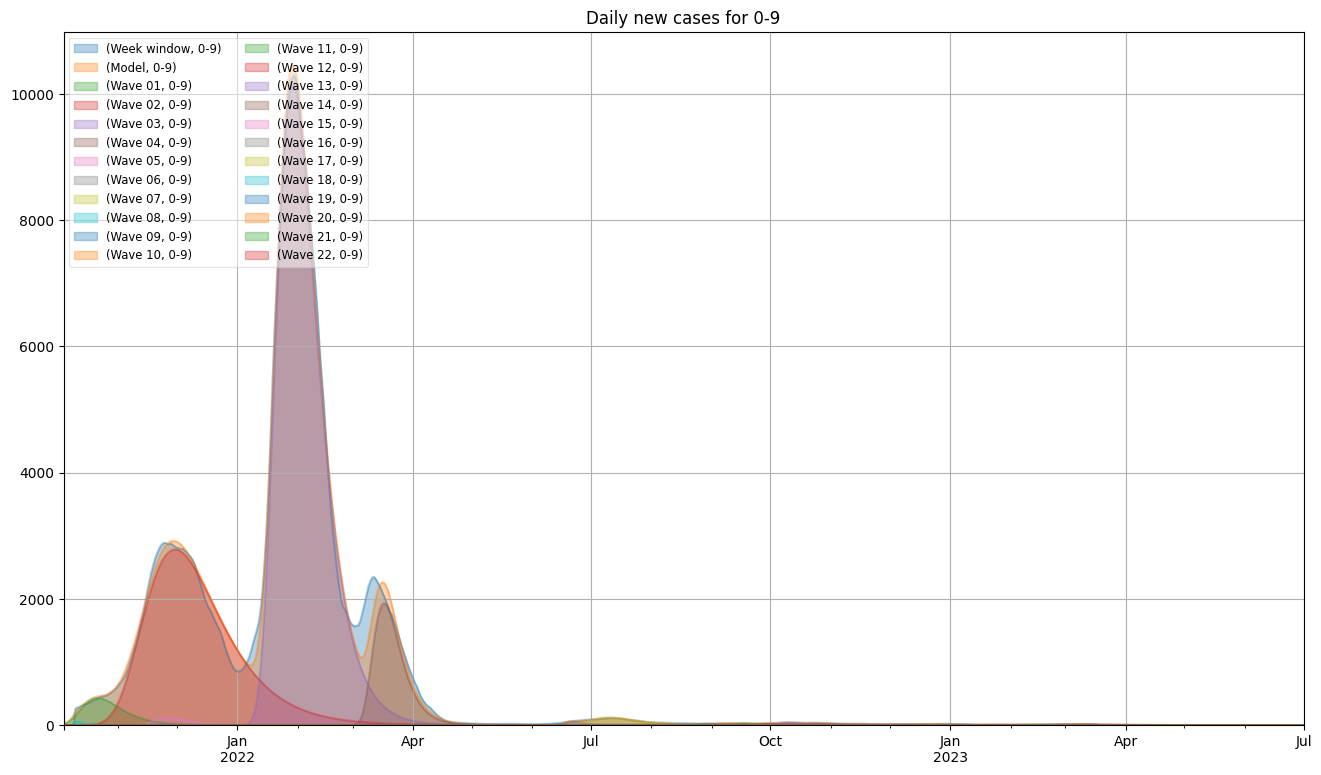

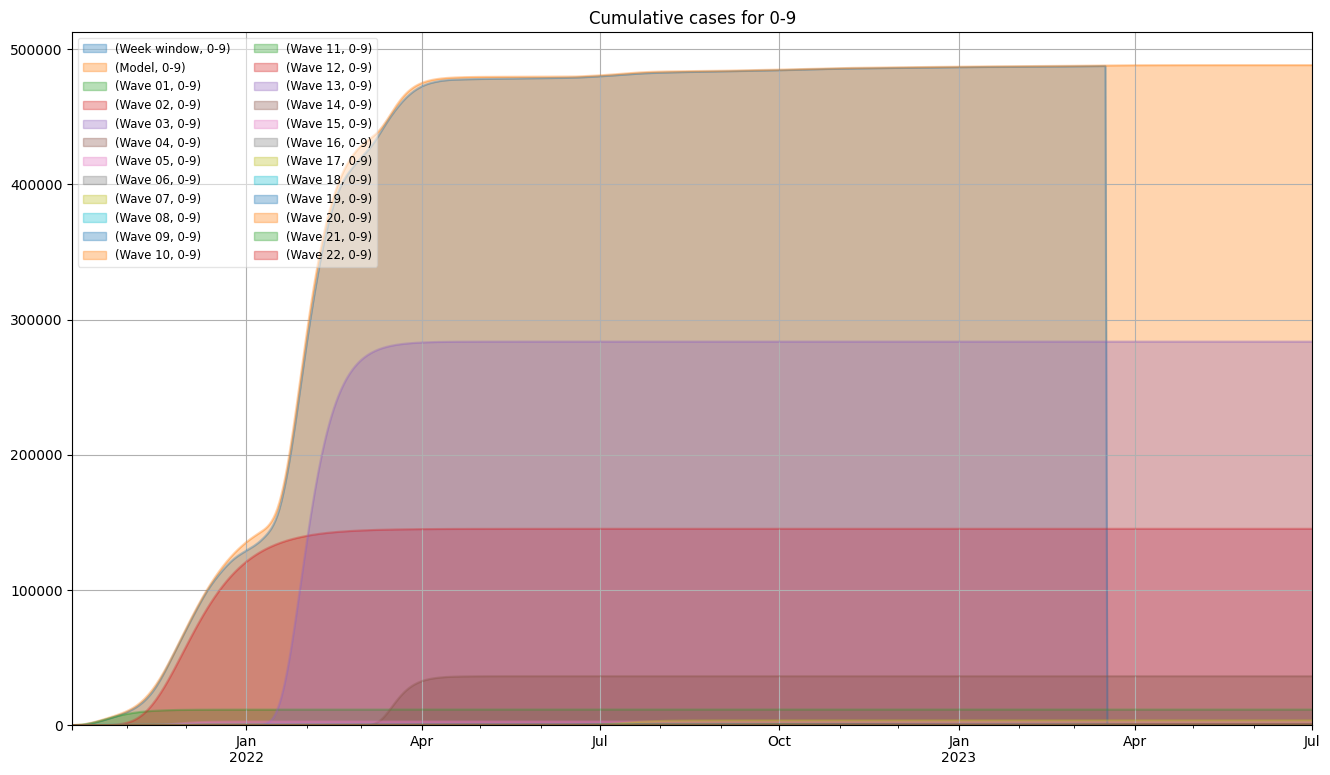

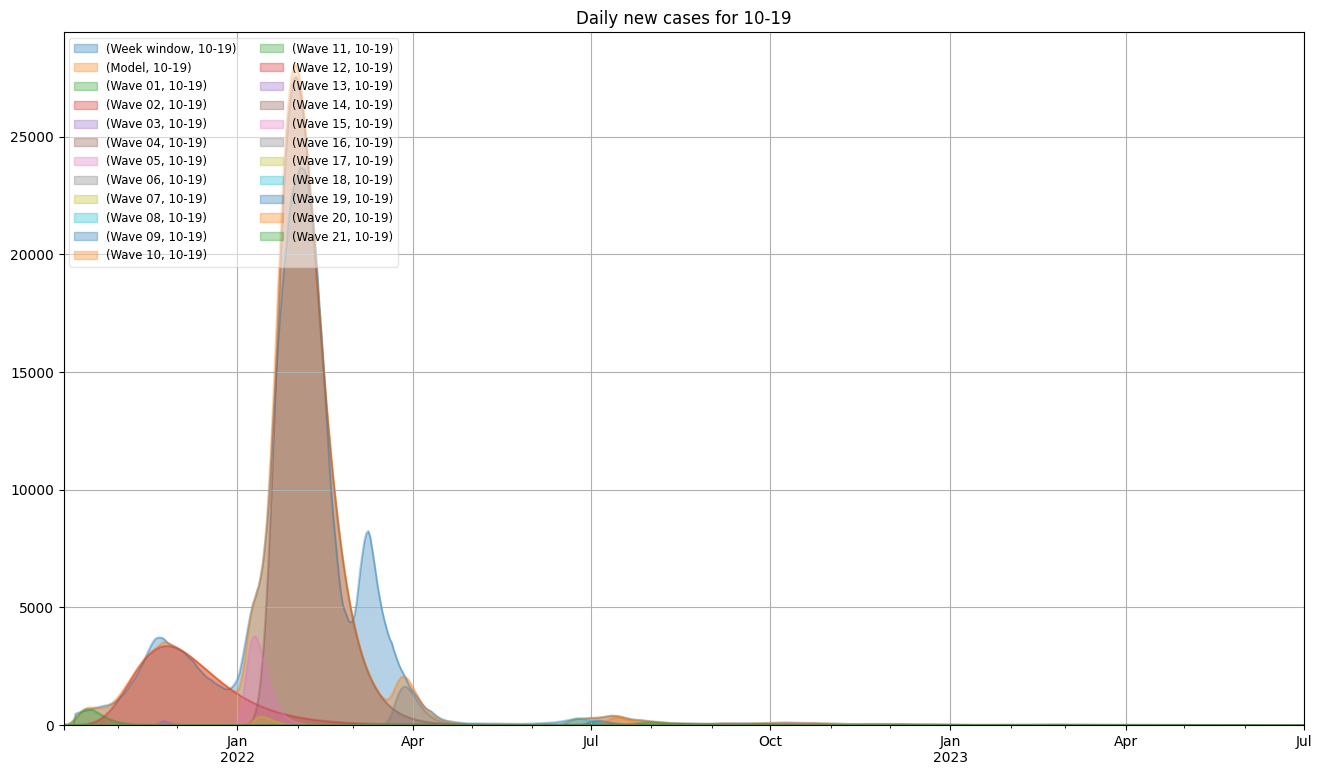

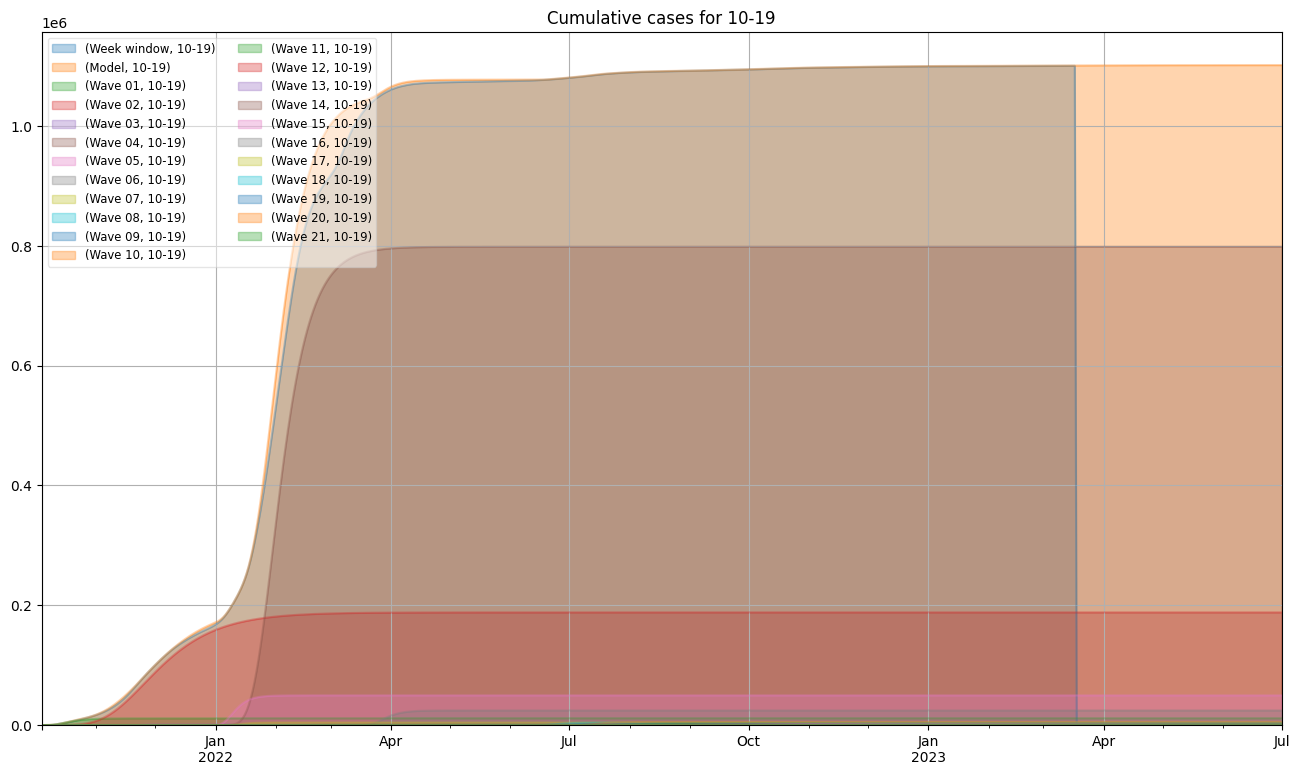

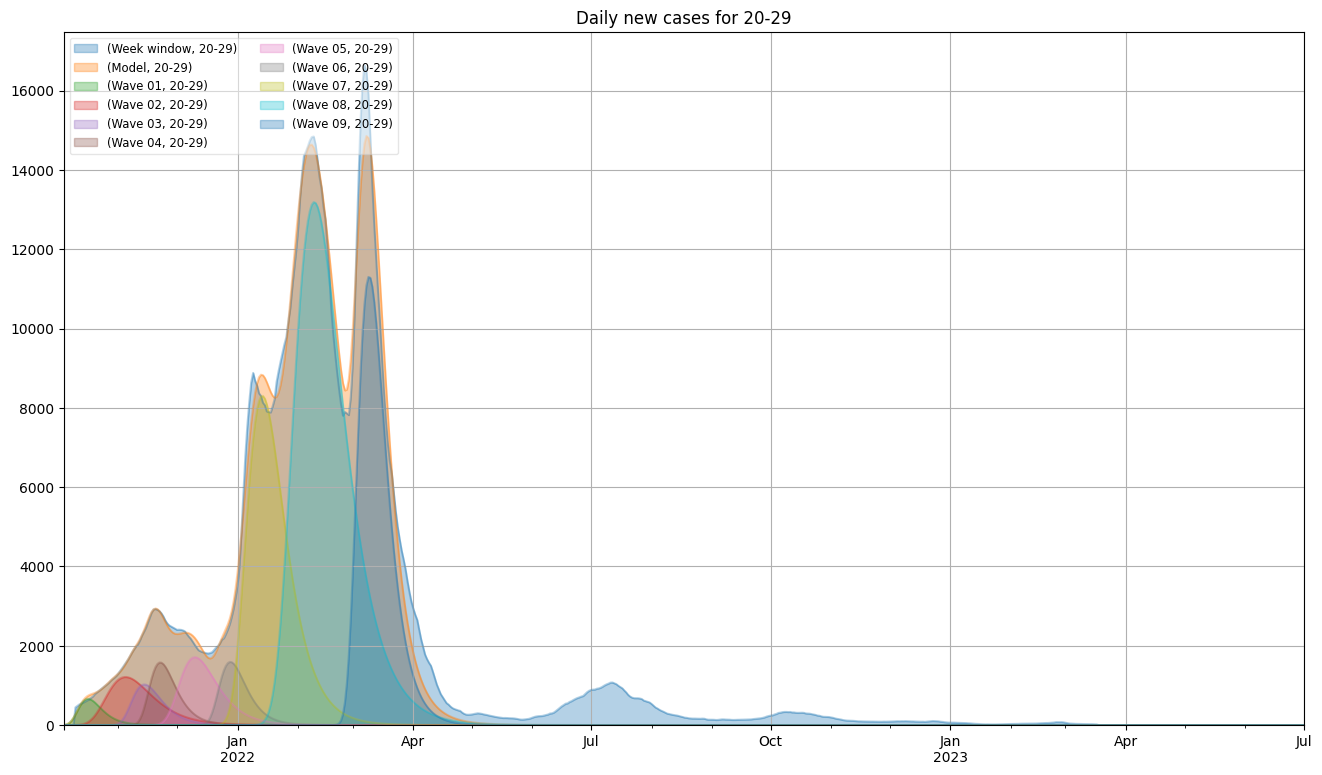

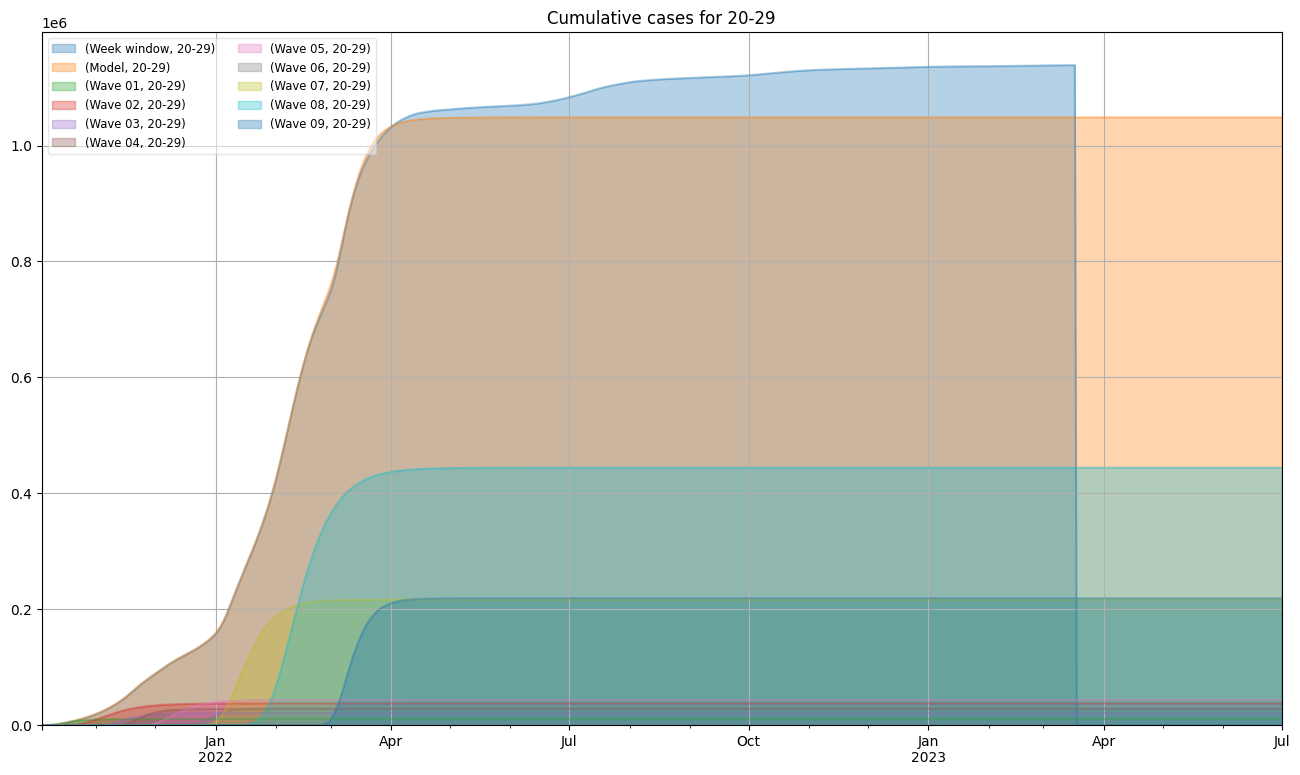

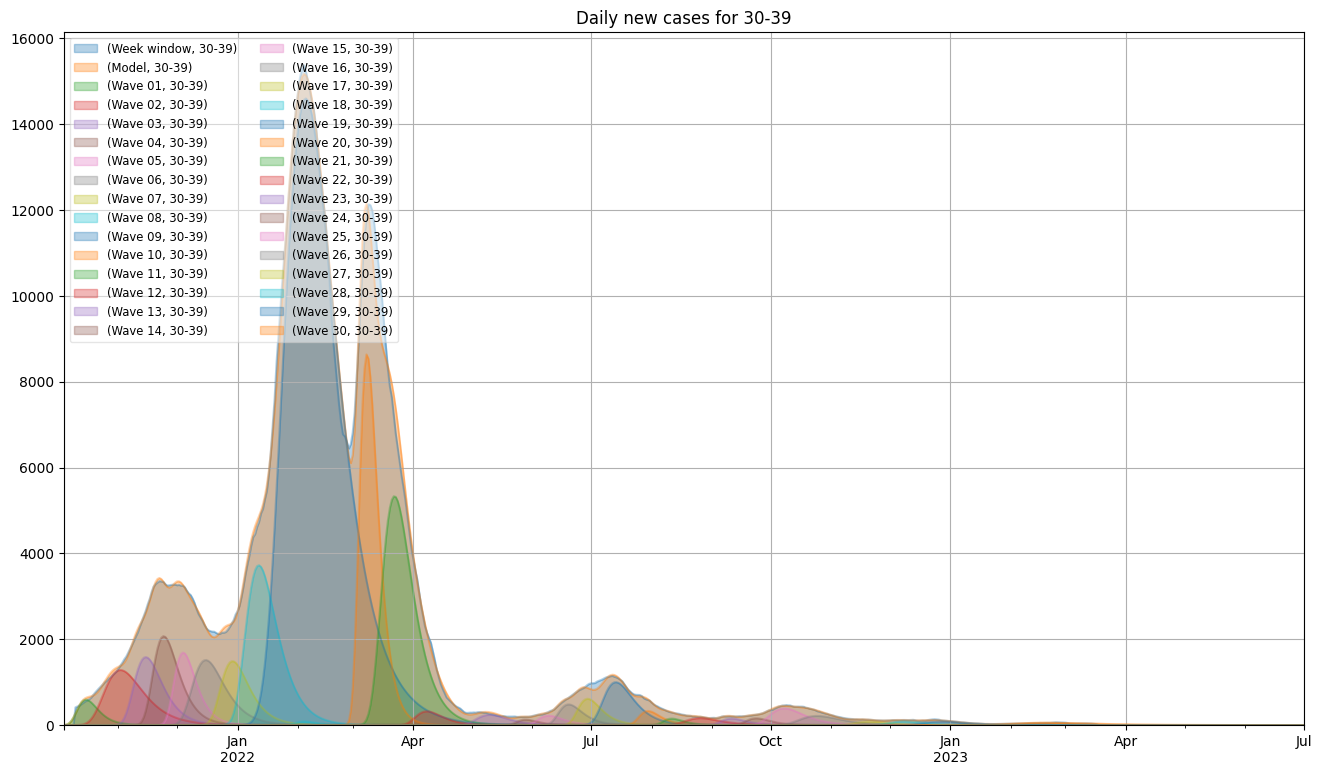

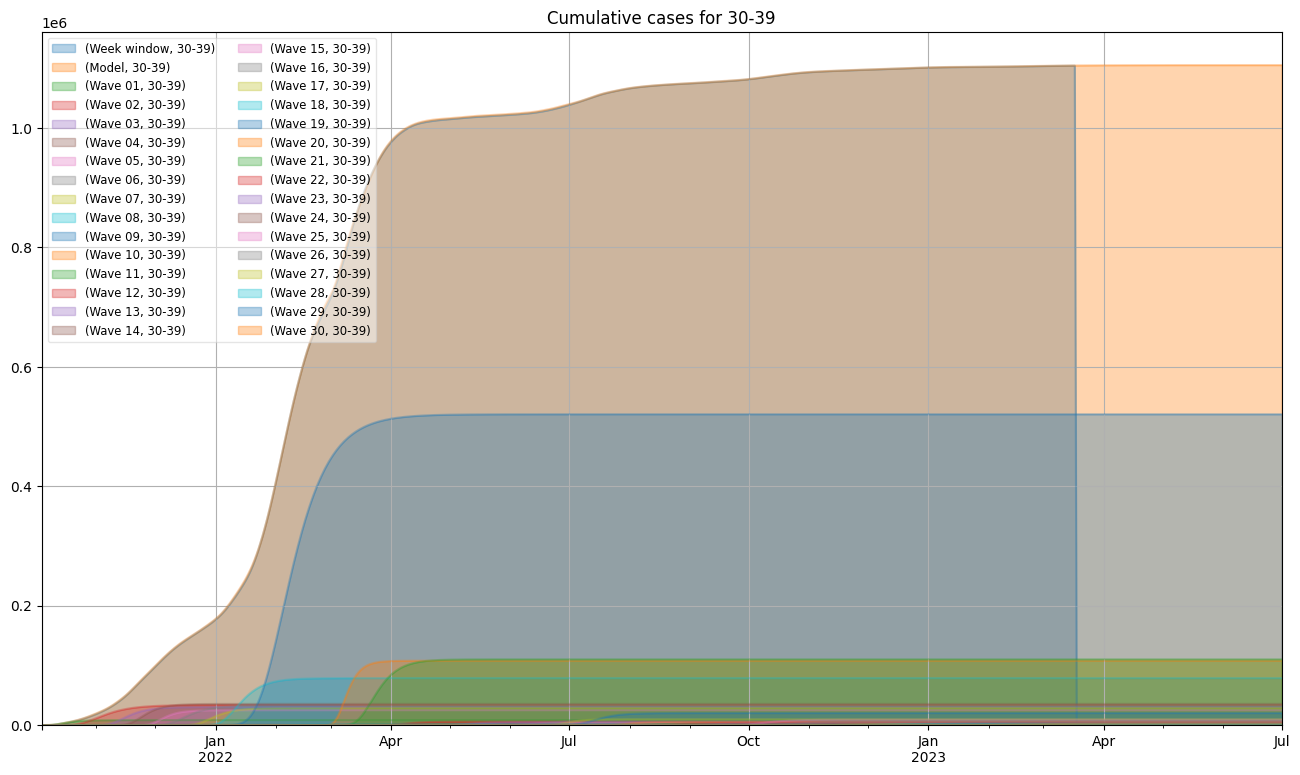

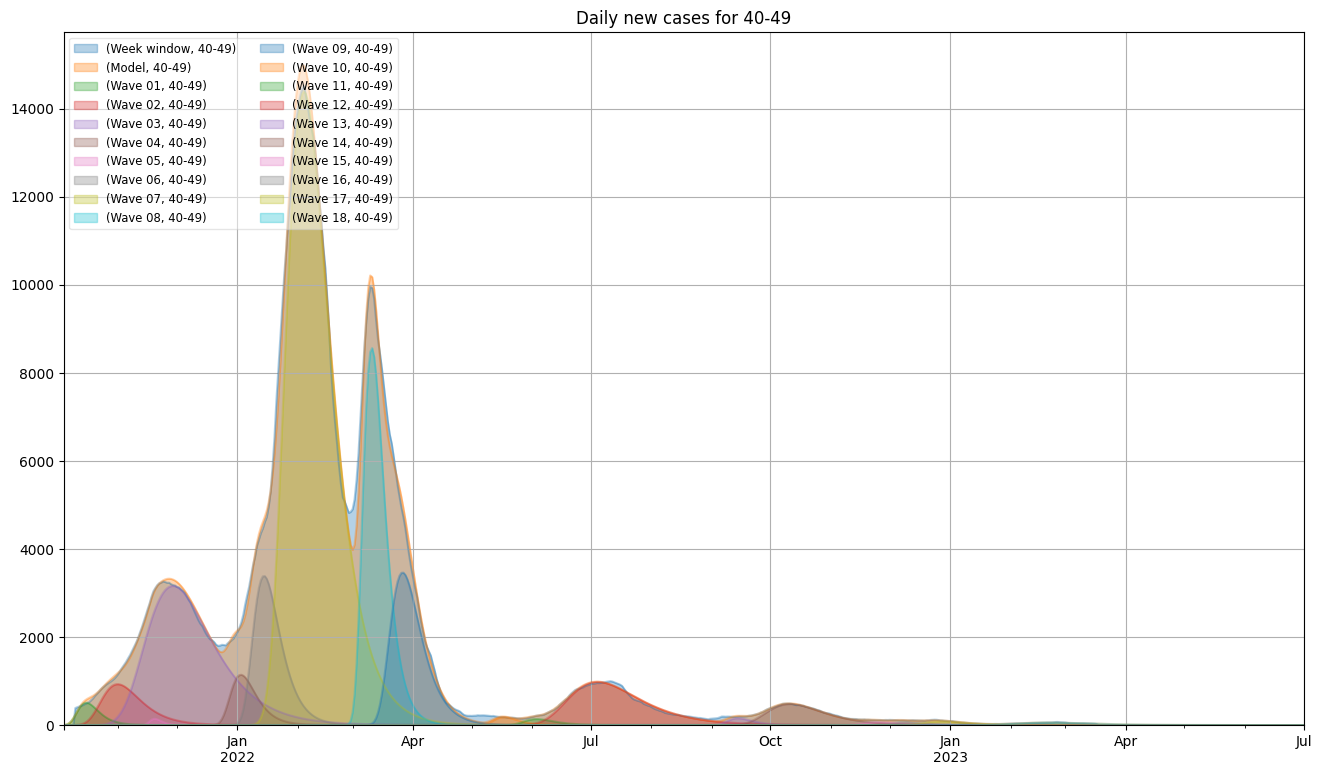

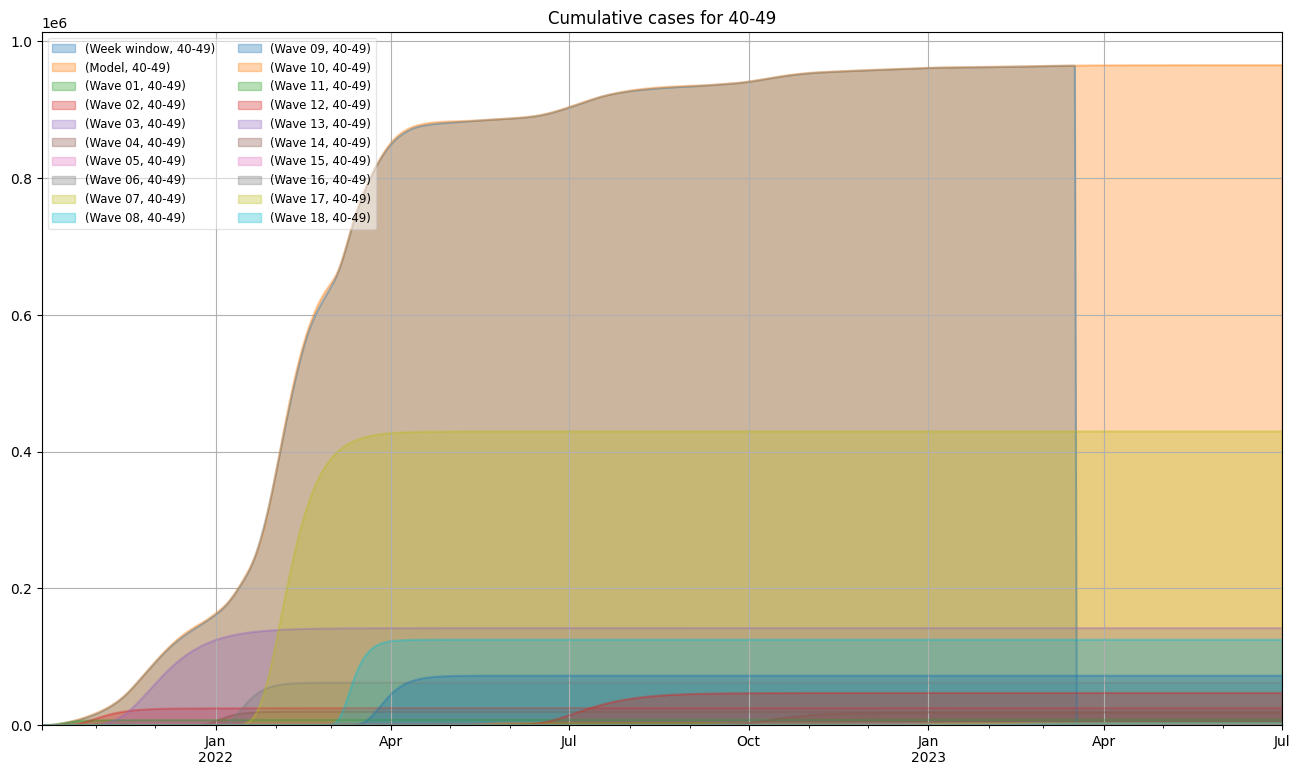

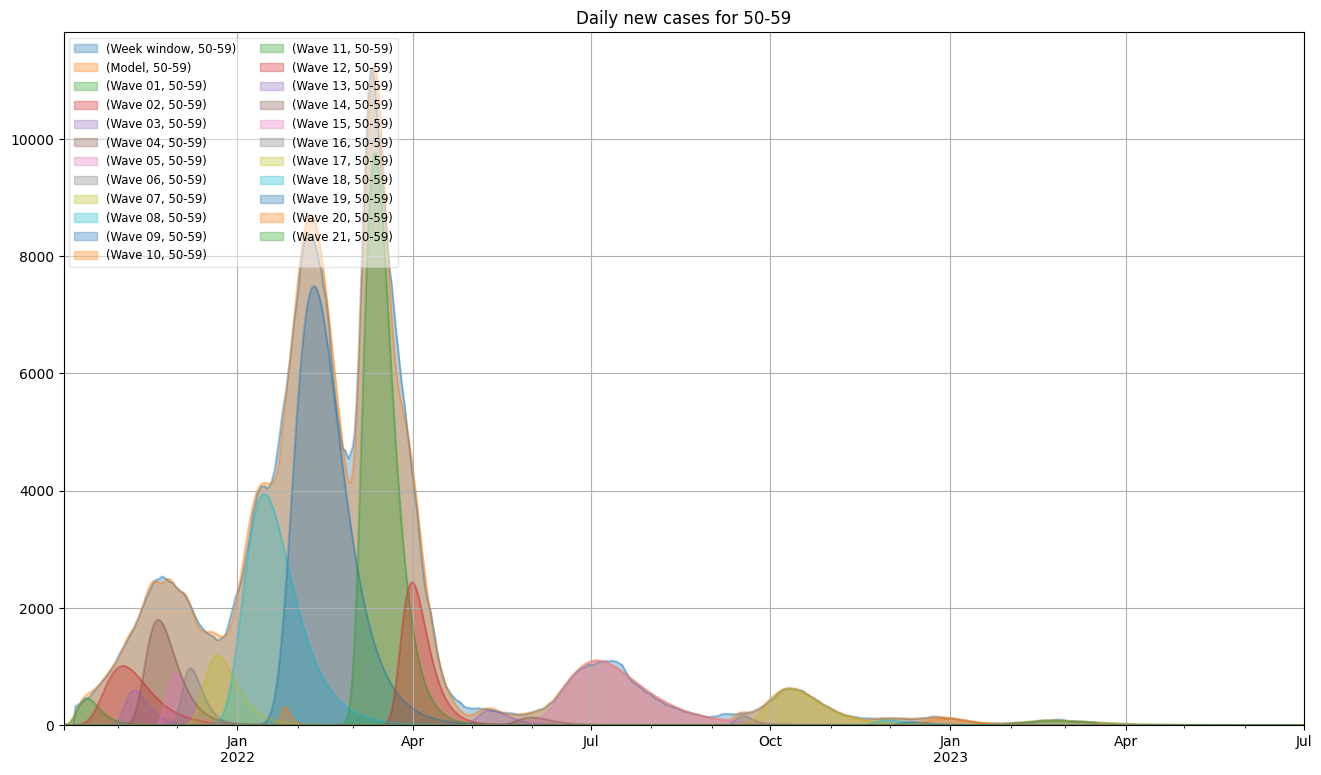

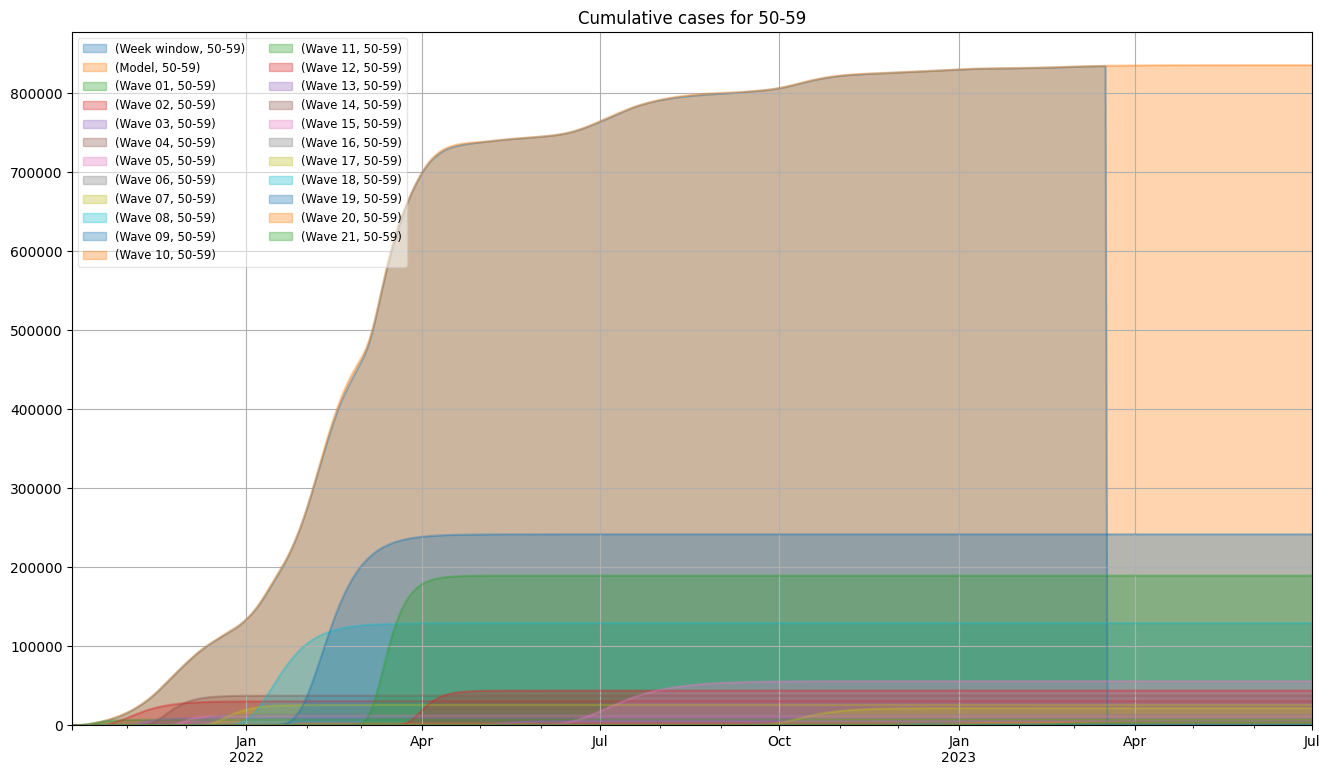

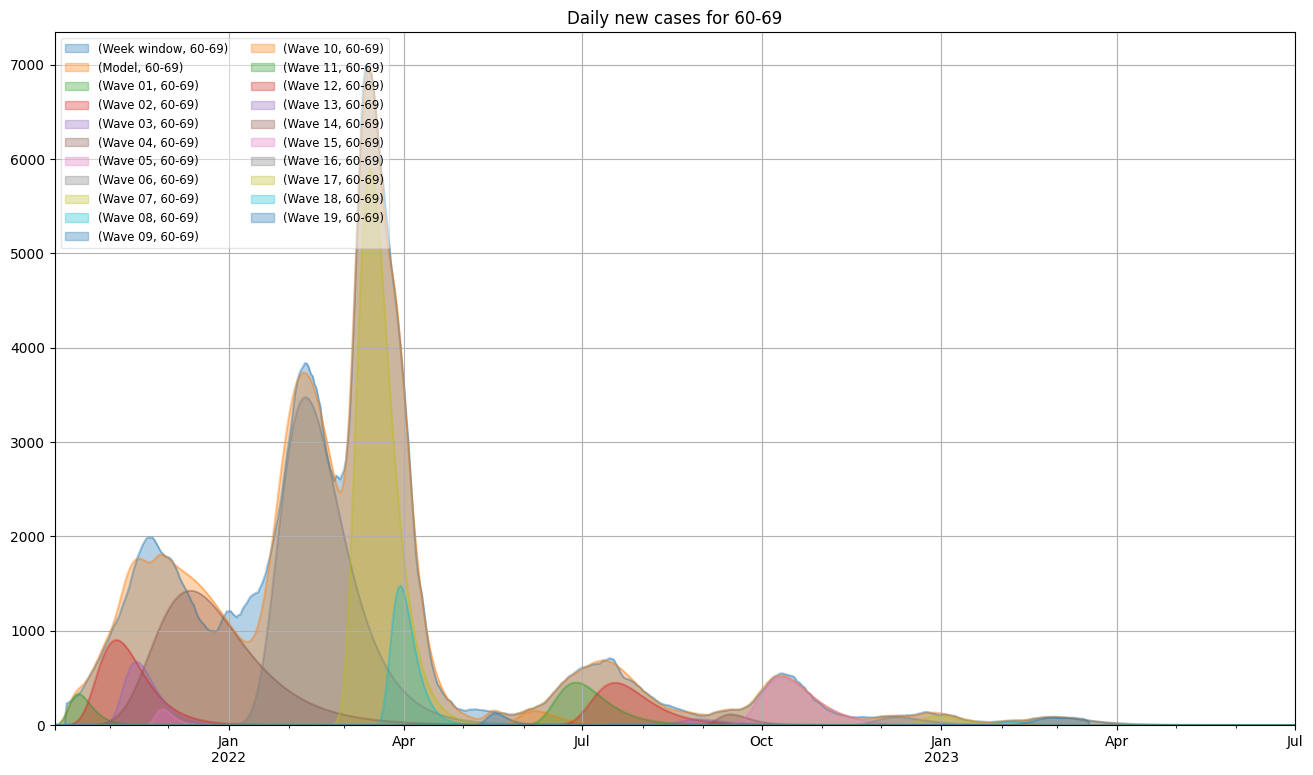

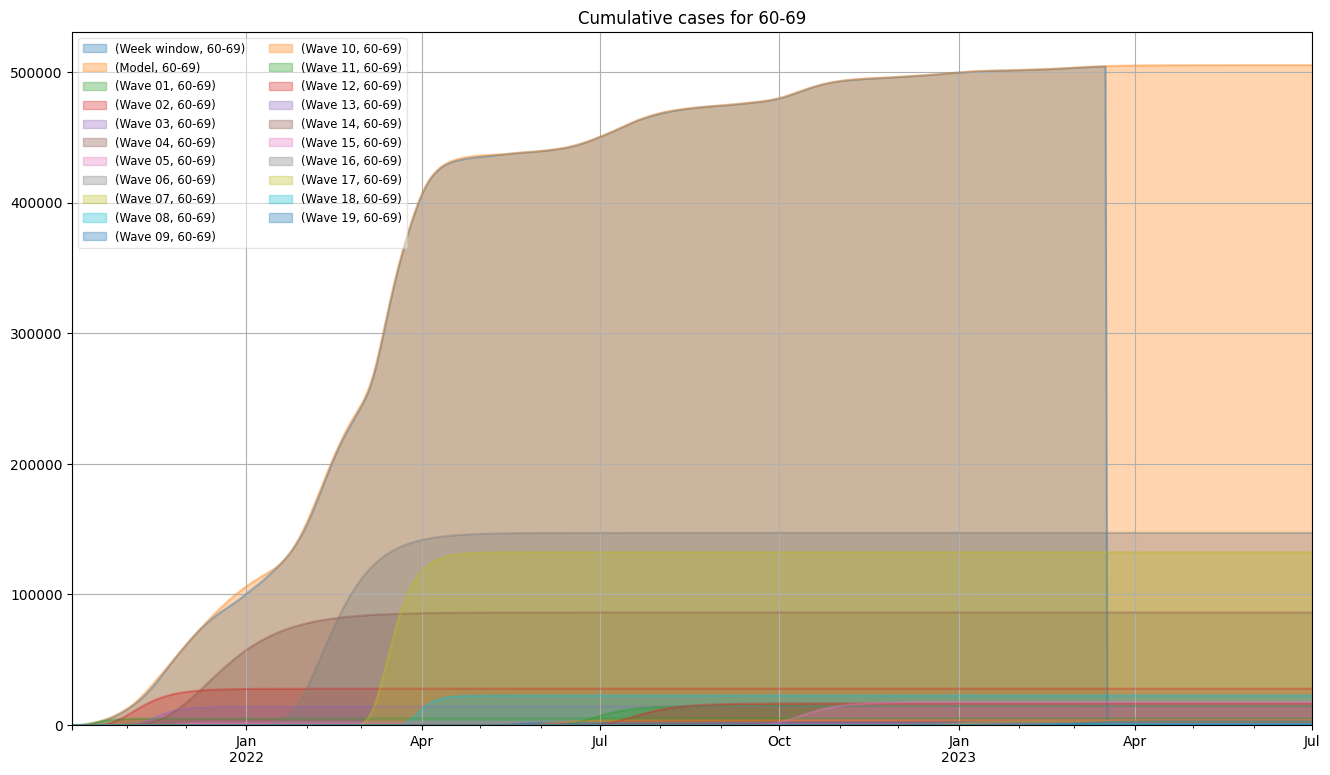

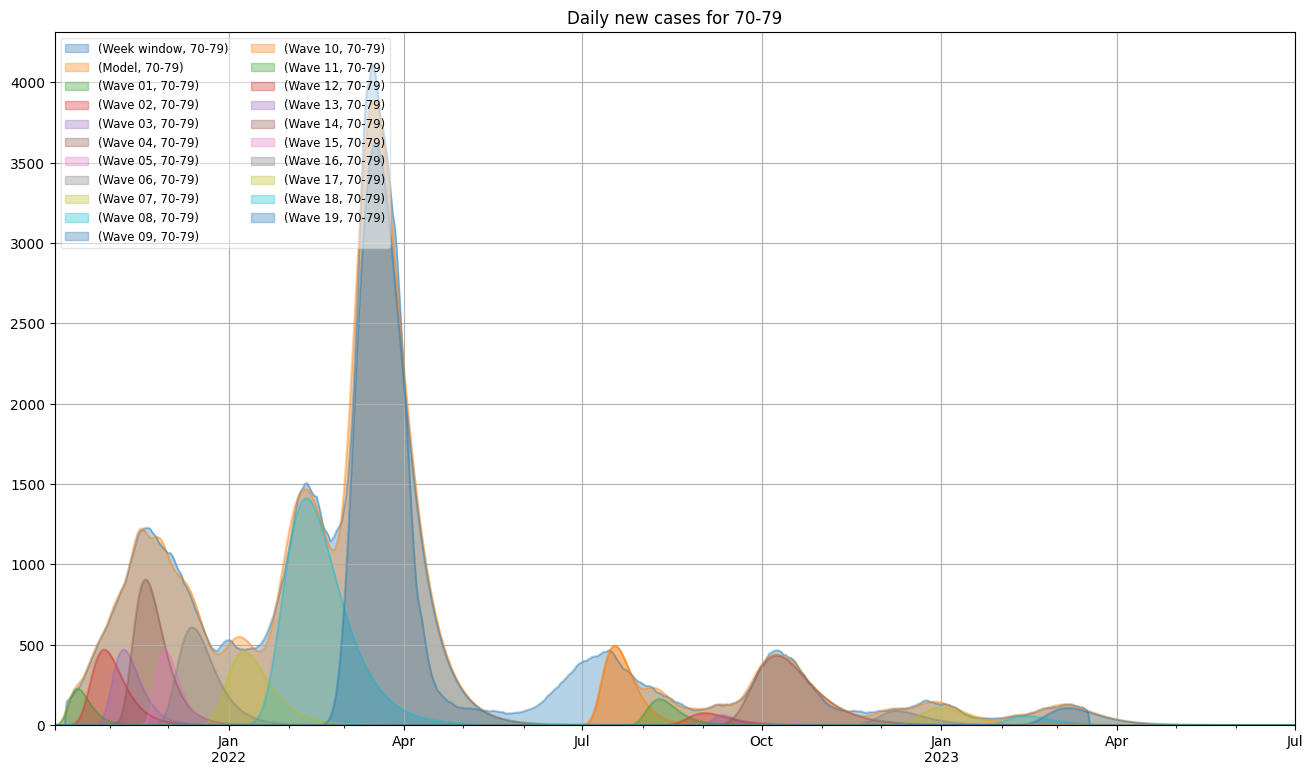

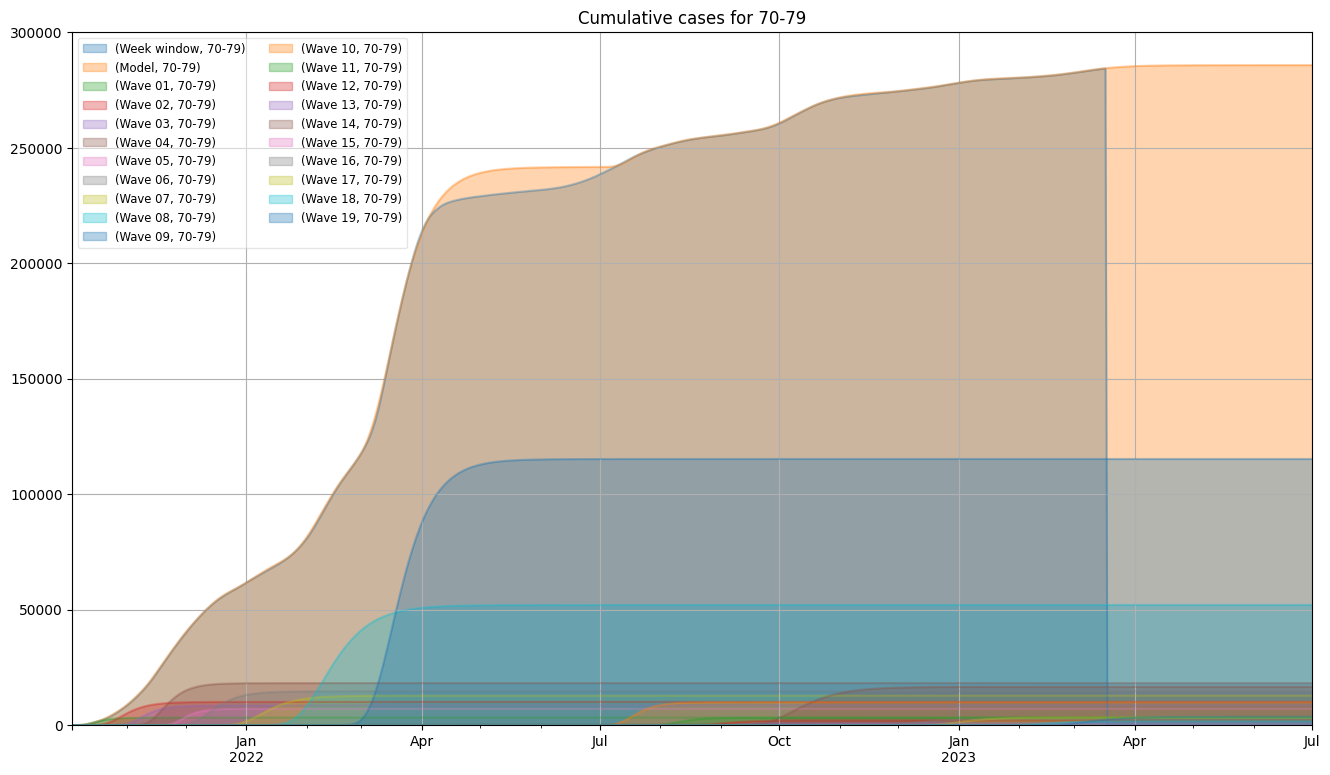

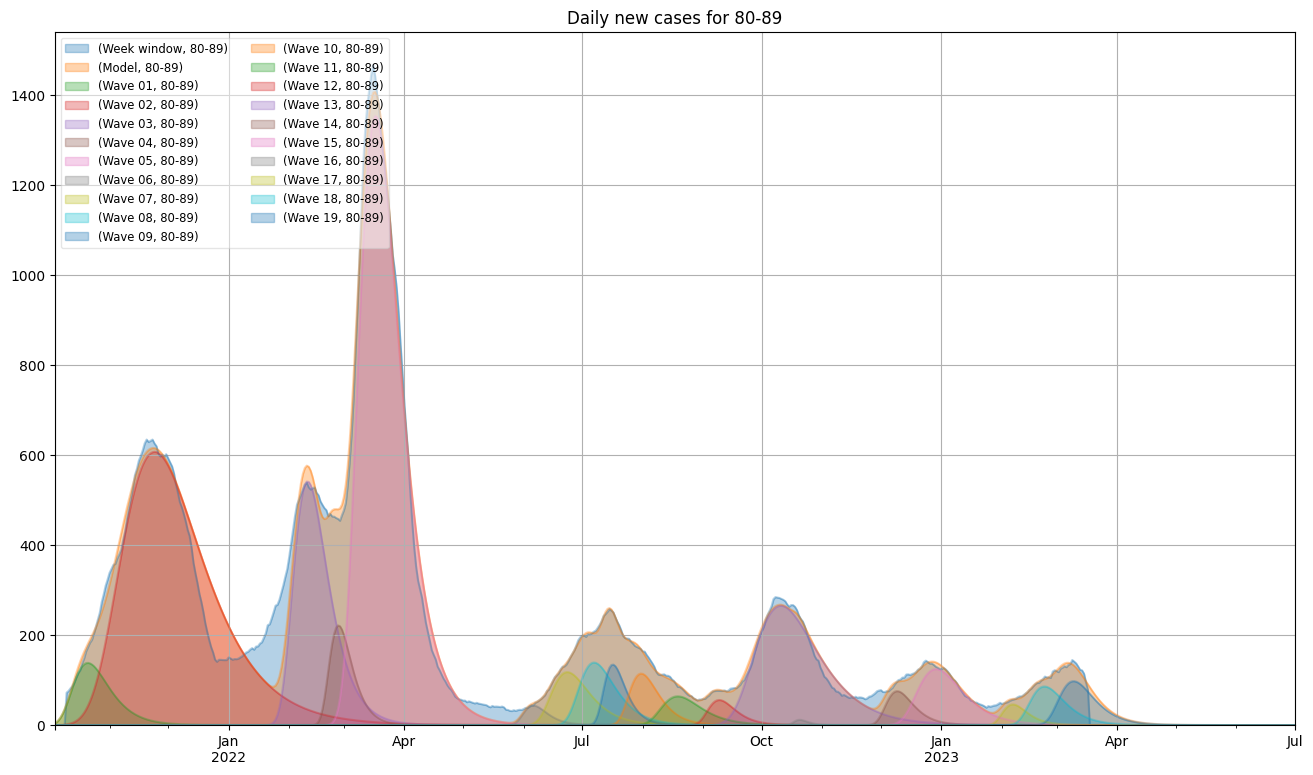

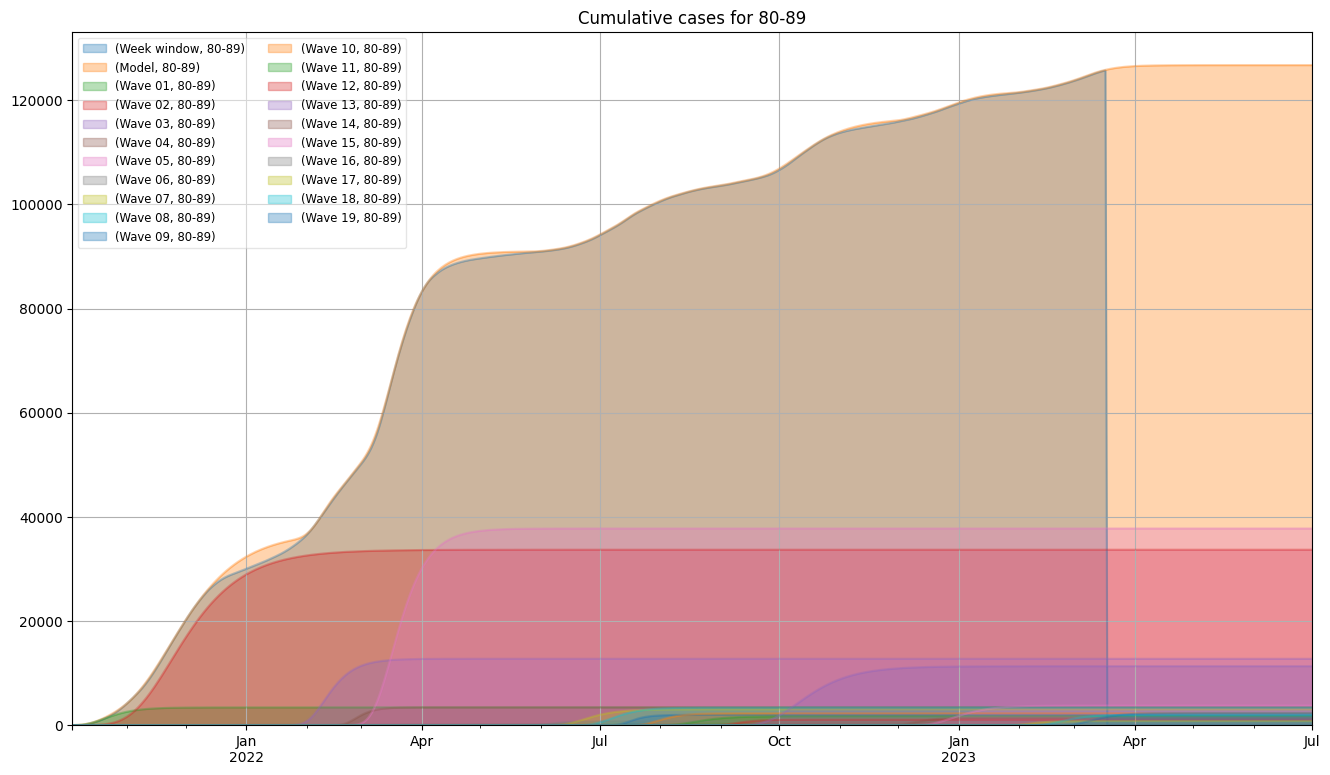

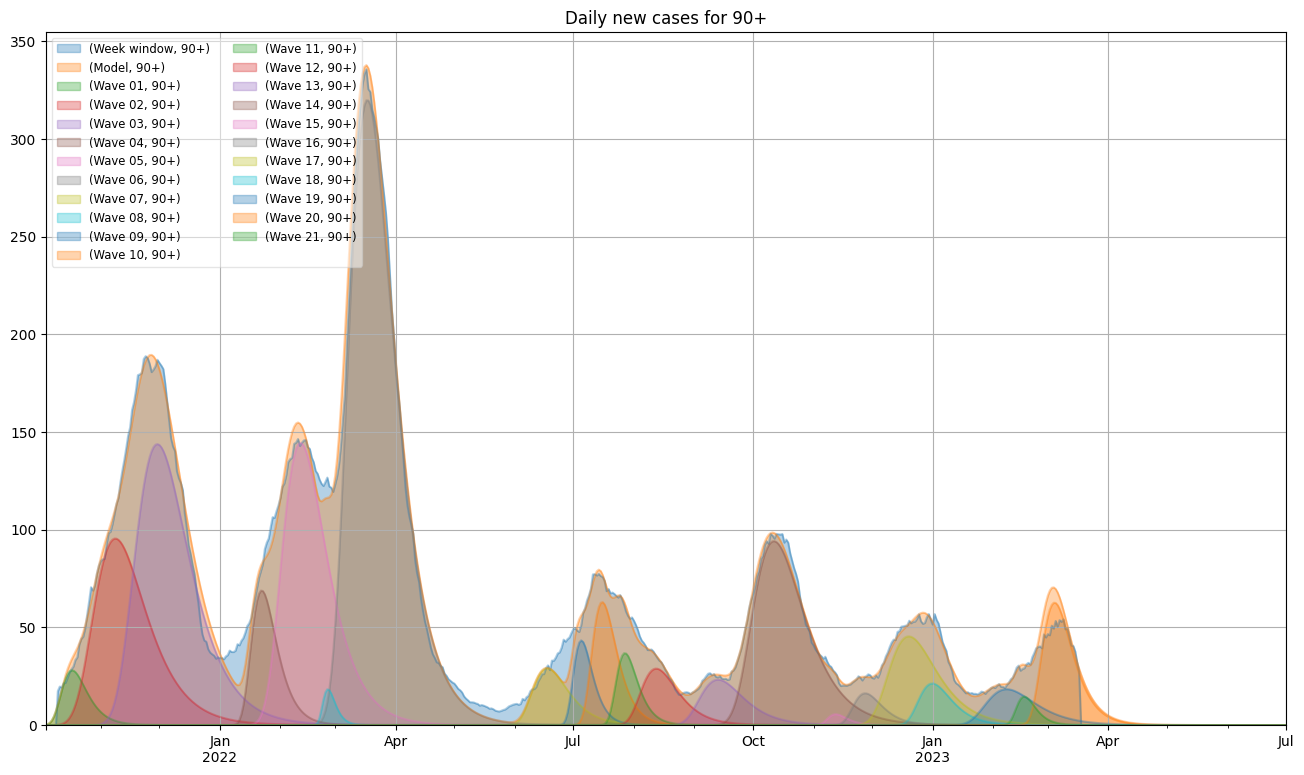

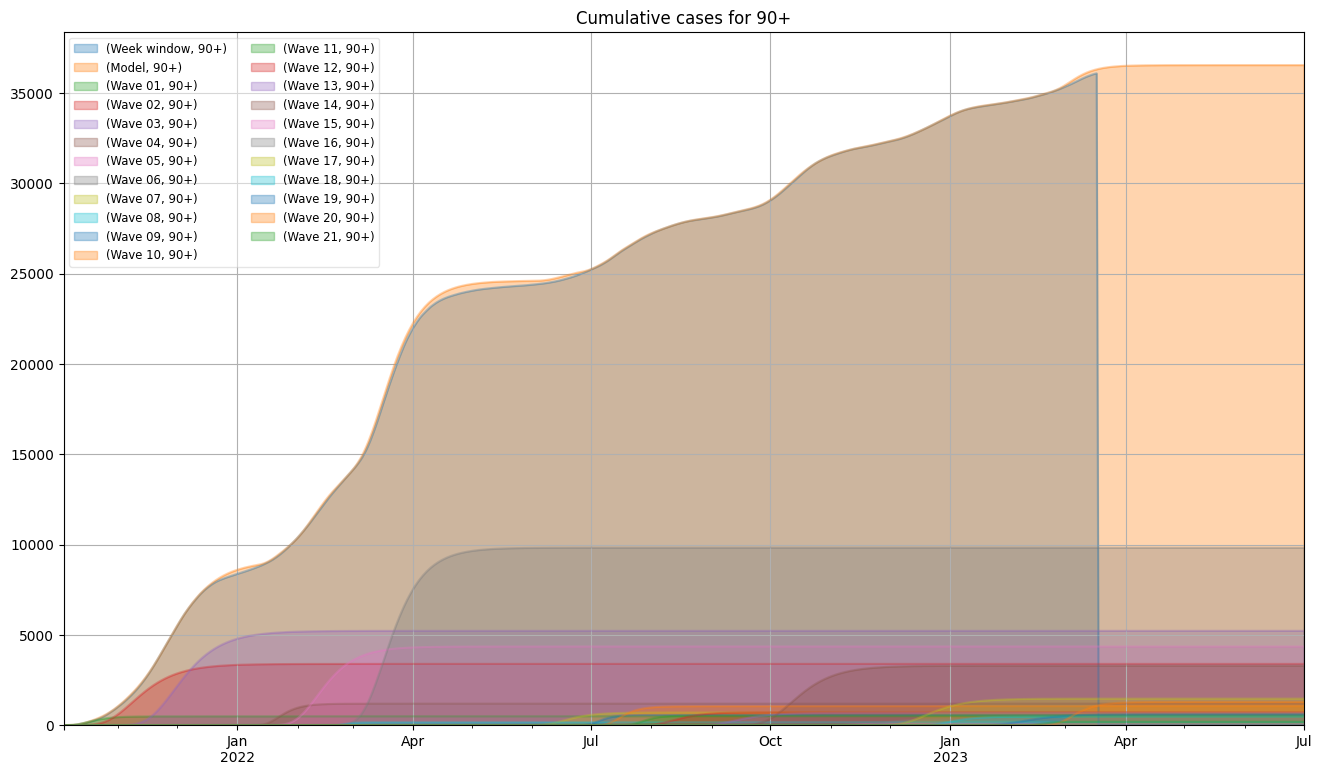

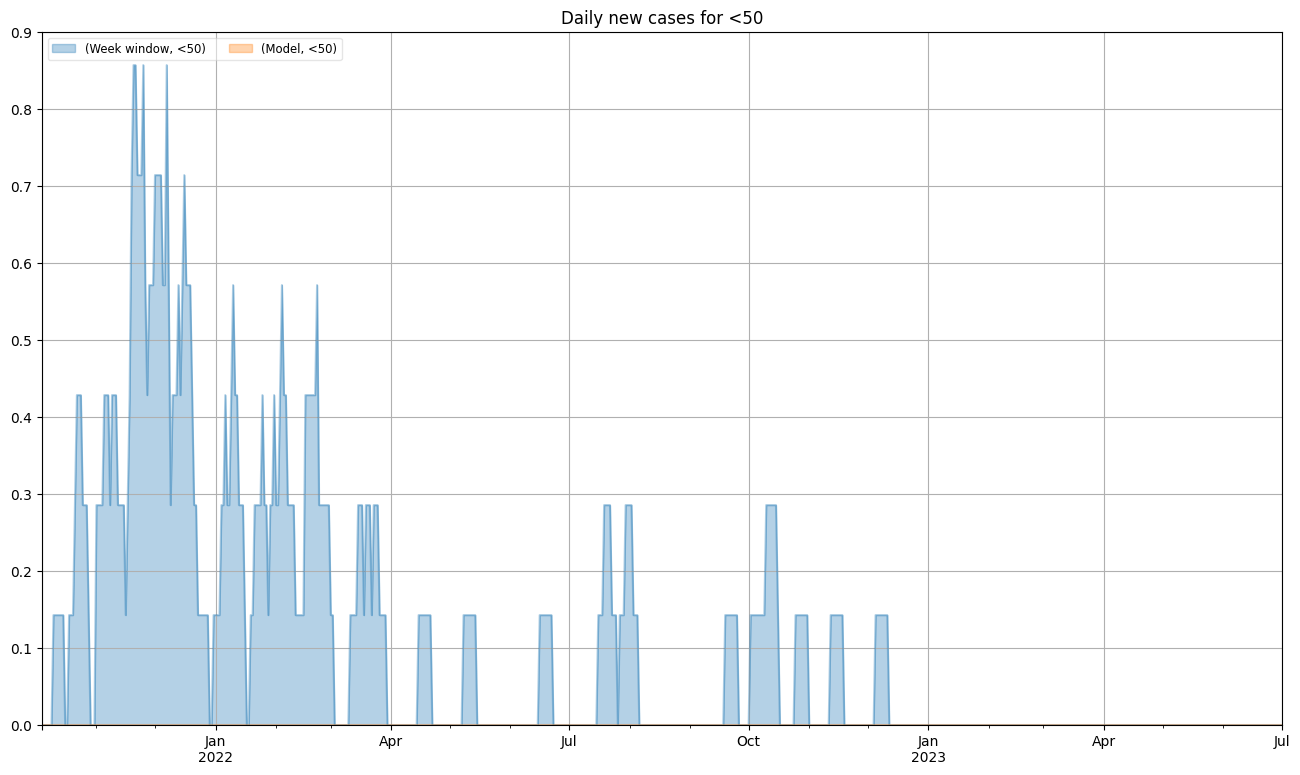

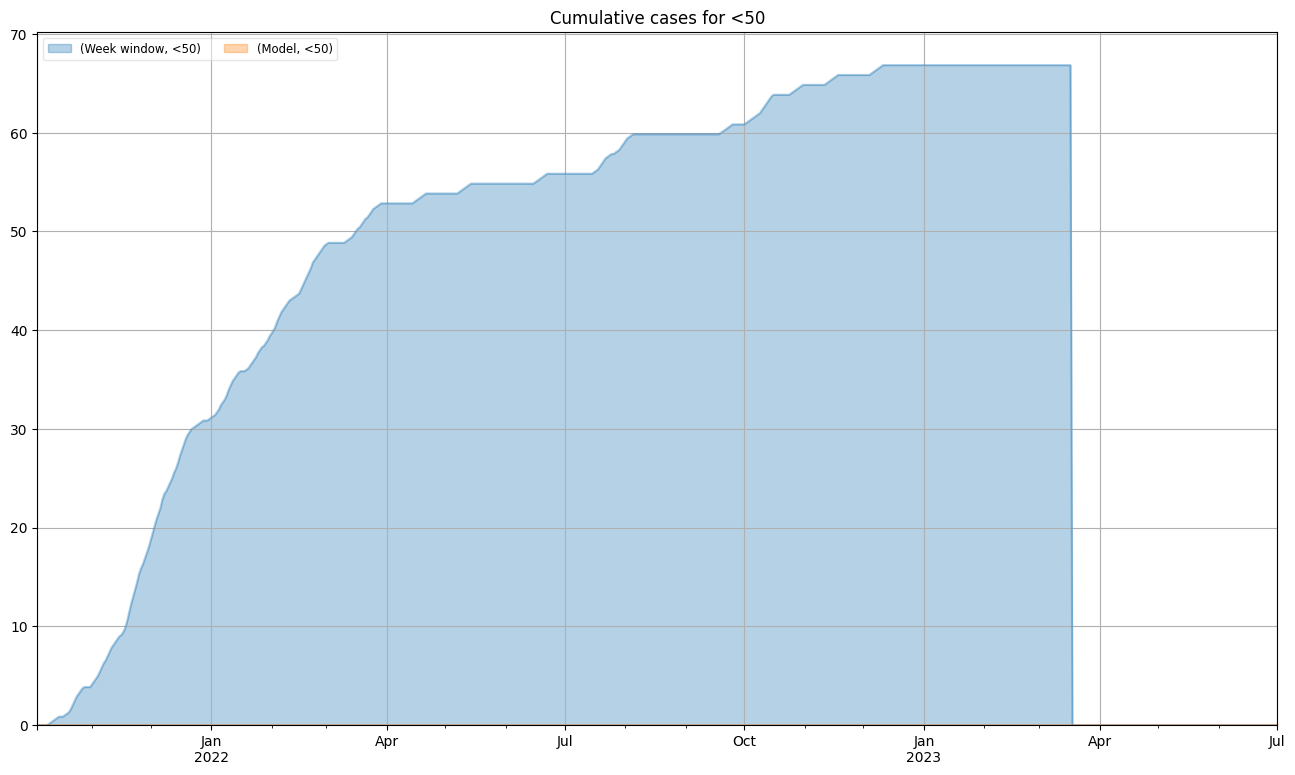

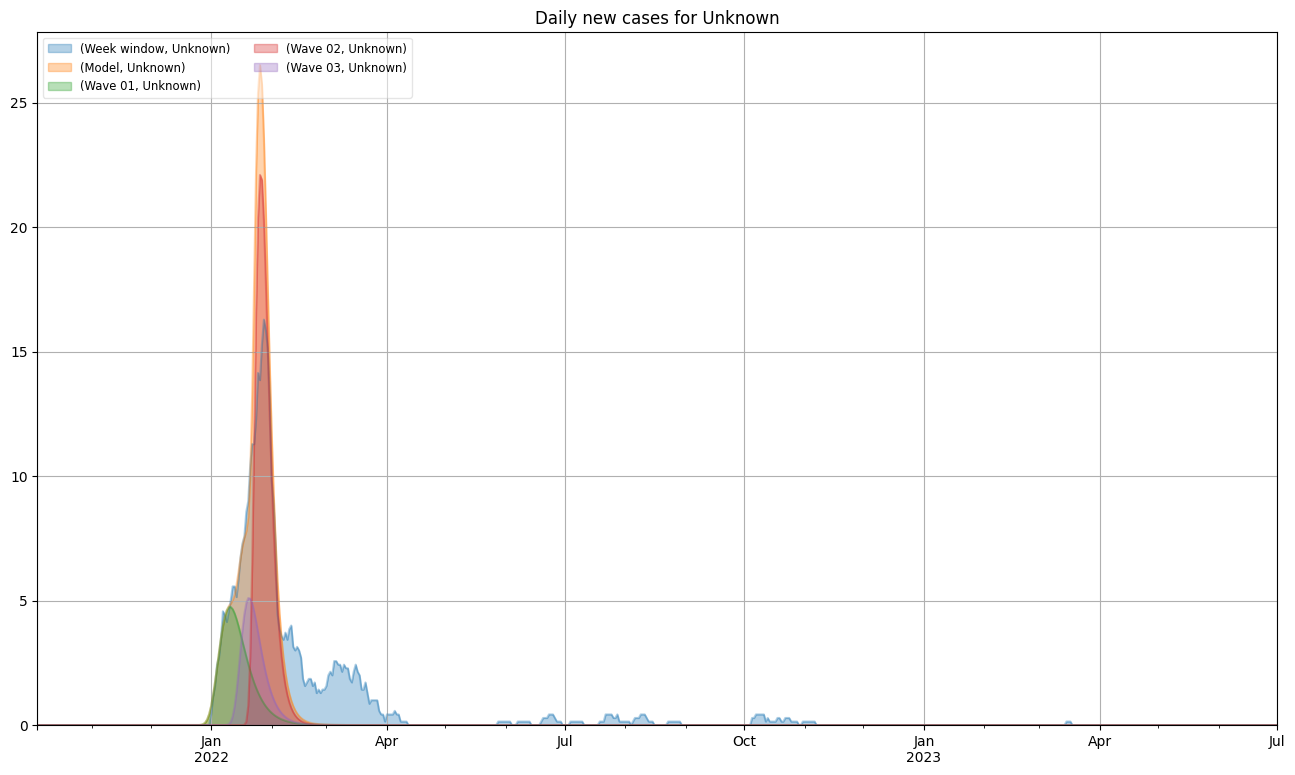

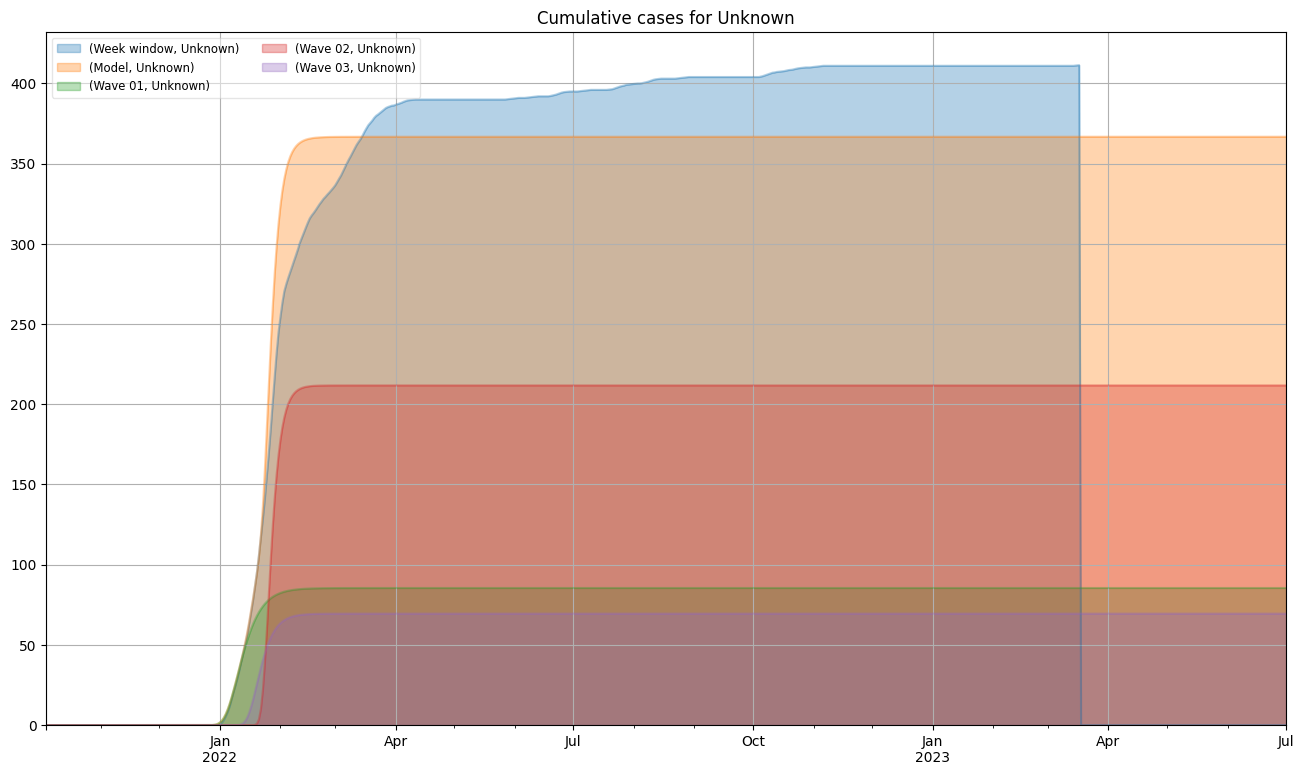

In [11]:
# Select regions to fit.
regions = np.sort(df[region].unique())

# Choose whether to output plots per region.
showplots = True

measure  = cases
smeasure = 'Week window' # smoothed
rmeasure = 'rcases'      # remaining
pmeasure = 'Model'       # predicted
wmeasure = 'Wave '       # waves

for region in regions:

    wave = 1

    df_geo[(pmeasure, region)] = 0
    df_geo[(smeasure, region)] = df_geo[measure][region].loc[:lastdate].rolling(7).mean()
    df_geo[(rmeasure, region)] = df_geo[smeasure][region]

    plotlist = [(smeasure, region), (pmeasure, region)]

    #countryname = df[df['geoId'] == country]['countriesAndTerritories'].iloc[0]
    #popdata = df[df['geoId'] == country]['popData2019'].iloc[0]

    #mincases = popdata / 1e6
    mincases = 2
    #mincases = df_geo[smeasure][country].sum() / 5000
    #mincases = max(popdata / 1e6, 10)

    print('Running multiple wave analysis for \'{}\''.format(region))
    print('Minimum number of cases is {:1.0f}'.format(mincases))

    while True:
        curwave = wmeasure + str((wave) + 1000)[-2:]
        df_geo[(curwave, region)] = 0

        df_pred = pd.DataFrame({'daynum':df_geo['daynum'],
                                measure:df_geo[rmeasure][region]})
        
        df_pred['gumdiv'] = df_pred[measure] / df_pred[measure].cumsum()
        df_pred = df_pred[(df_pred['gumdiv'] > 0) & (df_pred[measure] > mincases)]

        df_pred['linear'] = np.log(df_pred['gumdiv'])

        df_pred = df_pred[(df_pred['linear'] < -8/20) &
                          (df_pred['linear'] > -8/2)]

        if len(df_pred) <= 1:
            print('--- no data left')
            break

        eax = df_pred['daynum'].values.reshape(-1, 1)
        eay = df_pred['linear'].values.reshape(-1, 1)

        #eamodel = Earth()
        #eamodel = Earth(minspan=0)
        eamodel = Earth(minspan=1, penalty=0, endspan=0, thresh=1e-9, check_every=1)
        eamodel.fit(eax, eay)

        df_pred['earth'] = eamodel.predict(eax)

        daymin = df_pred['daynum'].min()
        daymax = df_pred['daynum'].max()

        #df_pred['gbgrad'] = np.gradient(df_pred['linear'])
        #df_pred['eagrad'] = np.gradient(df_pred['earth'])
        df_pred['gbgrad'] = df_pred['linear'] - df_pred['linear'].shift(1)
        df_pred['eagrad'] = df_pred['earth'] - df_pred['earth'].shift(1)

        fitmod = export.export_python_function(eamodel)

        df_pred['knot'] = ((abs(df_pred['eagrad'] - df_pred['eagrad'].shift(1)) > 1e-6) |
                           (df_pred['daynum'] == (daymin + 1)) |
                           (df_pred['daynum'] == daymax))
        df_pred['daycount'] = df_pred.reset_index().index

        df_knot = df_pred[df_pred['knot']][['daynum', 'daycount', 'eagrad']]
        df_knot['daysdata'] = df_knot['daycount'].shift(-1) - df_knot['daycount']
        df_knot['daystime'] = df_knot['daynum'].shift(-1) - df_knot['daynum']

        df_knot['cand'] = ((df_knot['eagrad'] < -2/80) &
                           (df_knot['daysdata'] >= 3))
        
        df_knot['since'] = df_knot['daynum'] - daymin
        df_knot['score'] = (df_knot['eagrad'] ** 2) * np.sqrt(df_knot['daysdata'] / np.sqrt(df_knot['since']))
        #df_knot['score'] = - df_knot['eagrad'] * df_knot['daysdata']
        df_knot['choice'] = df_knot['score'] == df_knot[df_knot['cand']]['score'].max()

        choice = df_knot[df_knot['choice']]
        if len(choice) == 0:
            print('--- no data for wave')
            break

        lower = choice['daynum'].values[0]
        upper = choice['daysdata'].values[0] + lower

        df_pred = df_pred[(df_pred['daynum'] >= lower) &
                          (df_pred['daynum'] <= upper)].copy()

        slope = (fitmod([[upper]])[0] - fitmod([[lower]])[0]) / (upper - lower)
        intercept = fitmod([[lower]])[0] - (lower * slope)

        beta = - 1 / slope
        mu = beta * (intercept + np.log(beta))

        df_pred['pgumb'] = gumpdf(df_pred['daynum'], beta, mu)
        df_pred['scale'] = df_pred[measure] / df_pred['pgumb']

        final = df_pred['scale'].mean()
        fincv = df_pred['scale'].std() / final

        df_geo[(curwave, region)] = final * gumpdf(df_geo['daynum'], beta, mu)        

        peak = df_geo[df_geo[(curwave, region)] == df_geo[(curwave, region)].max()].index.min()
        start = df_geo[(df_geo[(curwave, region)] >= 1) &
                       (df_geo[(curwave, region)].index < peak)].index.min()
        floor = df_geo[(df_geo[(curwave, region)] < 1) &
                       (df_geo[(curwave, region)].index > peak)].index.min()

        print('{} beta {:6.3f} mu {:3.0f} fit {:5.3f} peak {} from {} to {} size {:1.0f}'.format(
            curwave, beta, mu, (1 - fincv) ** 2, peak.date(), start.date(), floor.date(), final))
       
        df_geo[(pmeasure, region)] += df_geo[(curwave, region)]
        df_geo[(rmeasure, region)] -= df_geo[(curwave, region)]
        plotlist += [(curwave, region)]
        wave += 1
        
    if showplots:
        (
            df_geo
            [plotlist]
            .loc['20200101':'20230701']
            .plot(
                figsize=(16, 9),
                grid=True,
                kind='area',
                stacked=False,
                alpha=1/3,
                title='Daily new cases for '+region,
            )
            .legend(
                loc='upper left',
                fontsize='small',
                framealpha=1/2,
                ncol=2,
            )
        )
        (
            df_geo
            [plotlist]
            .loc['20200101':'20230701']
            .cumsum()
            .plot(
                figsize=(16, 9),
                grid=True,
                kind='area',
                stacked=False,
                alpha=1/3,
                title='Cumulative cases for '+region,
            )
            .legend(
                loc='upper left',
                fontsize='small',
                framealpha=1/2,
                ncol=2,
            )
        )

In [12]:
df_out = (
    df_geo
    [pmeasure]
    .melt(
        ignore_index=False,
    )
    .reset_index()
)
df_out.columns = (
    [
        'date',
        'location',
        'value'
    ]
)
(
    df_out
    .to_csv(
        'zzcorggd.csv',
    )
)

Keep exploring! Stay home, wash your hands, keep your distance.